# Import Module

In [84]:
!pip3 install category_encoders

In [85]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from category_encoders import JamesSteinEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, f1_score, roc_auc_score
import optuna
import datetime as dt

# Import Data

In [86]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [88]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


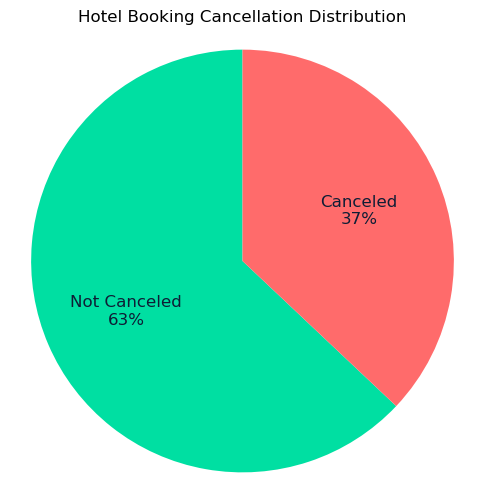

In [89]:
# Count values
label_map = {0 : 'Not Canceled', 1 : 'Canceled'}
cancel_counts = df['is_canceled'].value_counts()
labels = [label_map[i] for i in cancel_counts.index]

# Define custom autopct function to include label + percent
def make_autopct(values, labels):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        label_index = list(values).index(val)  
        return f"{labels[label_index]}\n{pct:.0f}%"
    return my_autopct

# Green for Not Canceled, Red for Canceled
colors = ['#00DFA2', '#FF6B6B']

# Dark background
plt.figure(figsize=(6,6), facecolor='white')  
plt.pie(cancel_counts, 
        labels=None, 
        colors=colors,
        autopct=make_autopct(cancel_counts, labels),
        textprops={'color': '#0E1D35', 'fontsize': 12},
        startangle=90)

# Set dark background inside the plot area
plt.gca().set_facecolor('white')
plt.title('Hotel Booking Cancellation Distribution', color = 'Black')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

In [90]:
# Combine datasets to check the revenue
df_temp = df.copy()
df_temp['length_of_stay'] = df_temp['stays_in_weekend_nights'] + df_temp['stays_in_week_nights']
df_temp['total_revenue'] = df_temp['length_of_stay'] * df_temp['adr']
df_temp['total_revenue'].sum()
expected_revenue = df_temp.groupby(['hotel'])['total_revenue'].agg('sum')
actual_revenue = df_temp[df_temp['is_canceled']==0].groupby(['hotel'])['total_revenue'].agg('sum')

revenue_df = pd.DataFrame({
    'Projected Revenue' : expected_revenue,
    'Actual Revenue' : actual_revenue
})

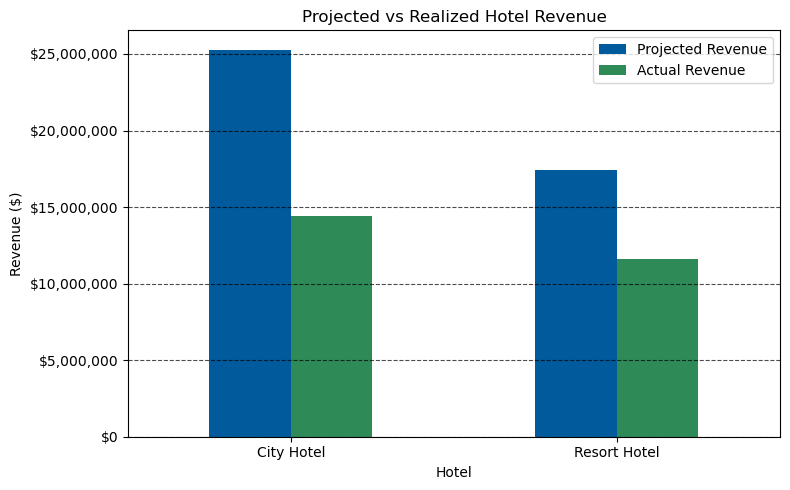

In [91]:
# Calculate percent drop
revenue_df['Drop (%)'] = ((revenue_df['Projected Revenue'] - revenue_df['Actual Revenue']) 
                          / revenue_df['Projected Revenue']) * 100

# Bar chart
fig, ax = plt.subplots(figsize=(8,5), facecolor='white')  # Gold background
ax.set_facecolor('white')

colors = ['#005A9C', '#2E8B57']  # Blue for projected, green for actual

ax = revenue_df[['Projected Revenue', 'Actual Revenue']].plot(
    kind='bar', ax=ax, color=colors)

# Add drop labels
for i, (idx, row) in enumerate(revenue_df.iterrows()):
    drop_pct = row['Drop (%)']
    y_pos = max(row['Projected Revenue'], row['Actual Revenue']) + 100000
    #ax.text(x=i, y=y_pos, s=f"\u2B07 {drop_pct:.1f}%", ha='center', fontsize=12, color='red')

# Format and label
ax.set_title('Projected vs Realized Hotel Revenue')
ax.set_ylabel('Revenue ($)')
ax.set_xlabel('Hotel')
ax.set_xticklabels(revenue_df.index, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7, color = 'black')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.tight_layout()
plt.show()


In [92]:
# Split the data into train, valid, and test datasets
train, temp = train_test_split(df, test_size=0.2, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Data Visualization & Preprocessing

## a.) Missing Value

In [93]:
# Check the missing value counts
train.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             374
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13061
company                           90092


In [94]:
# Drop column with high missing value
train = train.drop(columns=["agent", "company"])
valid = valid.drop(columns=["agent", "company"])
test = test.drop(columns=["agent", "company"])

In [95]:
# Fill baby column misisng value with mode
train['children'] = train['children'].fillna(train['babies'].mode()[0]).astype(int)
valid['children'] = valid['children'].fillna(valid['babies'].mode()[0]).astype(int)
test['children'] = test['children'].fillna(test['babies'].mode()[0]).astype(int)

## b.) Logical Error

In [96]:
# Check for logical errors
train[(train['adults'] == 0) & (train['children'] == 0) & (train['babies'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
100563,City Hotel,0,88,2016,October,41,7,6,16,0,...,K,7,No Deposit,0,Transient-Party,0.0,0,1,Check-Out,2016-10-29
114908,City Hotel,0,1,2017,June,26,28,0,0,0,...,A,1,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-06-28
62967,City Hotel,1,1,2017,January,4,25,0,2,0,...,E,1,No Deposit,0,Transient,0.0,0,0,Canceled,2017-01-25
54037,City Hotel,1,244,2016,July,28,6,2,4,0,...,E,0,No Deposit,0,Transient,0.0,0,0,Canceled,2016-02-23
60651,City Hotel,1,0,2016,November,47,17,4,11,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102710,City Hotel,0,0,2016,December,50,5,0,0,0,...,K,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2016-12-05
107510,City Hotel,0,17,2017,March,9,3,3,7,0,...,K,1,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-03-13
91428,City Hotel,0,0,2016,June,26,21,0,0,0,...,C,1,No Deposit,0,Transient,0.0,0,1,Check-Out,2016-06-21
109945,City Hotel,0,10,2017,April,15,14,2,3,0,...,K,1,No Deposit,0,Transient,0.0,0,1,Check-Out,2017-04-19


In [97]:
# Remove rows that without number of occupants
train = train.drop(index = train[(train['adults'] == 0) & (train['children'] == 0) & (train['babies'] == 0)].index)
valid = valid.drop(index = valid[(valid['adults'] == 0) & (valid['children'] == 0) & (valid['babies'] == 0)].index)
test = test.drop(index = test[(test['adults'] == 0) & (test['children'] == 0) & (test['babies'] == 0)].index)

## c.) Hotel

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/3153166811.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='hotel', palette='viridis')


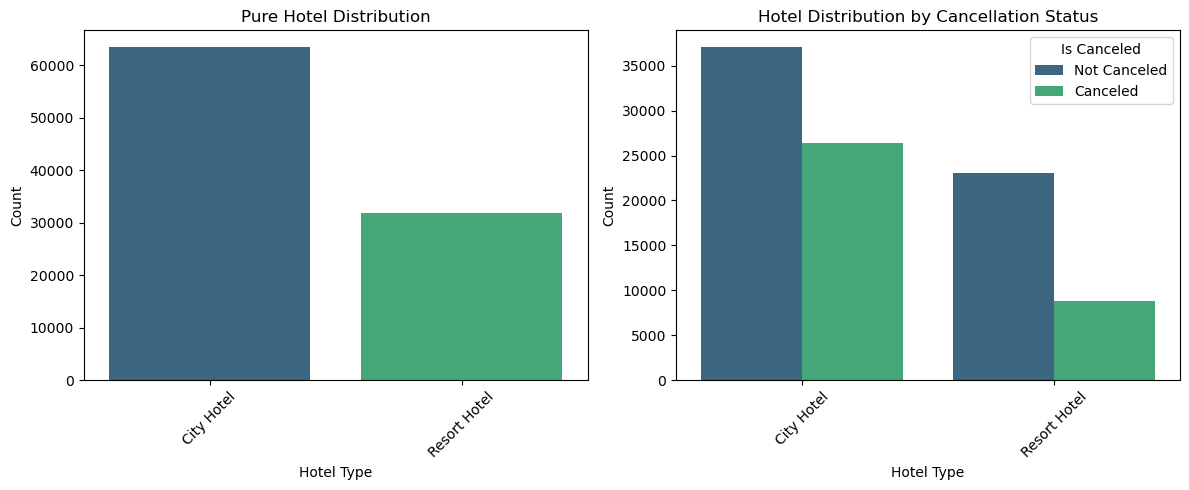

In [98]:
# Visualize the hotel distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure hotel distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='hotel', palette='viridis')
plt.title('Pure Hotel Distribution')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Hotel distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='hotel', hue='is_canceled', palette='viridis')
plt.title('Hotel Distribution by Cancellation Status')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## d.) Lead Time 

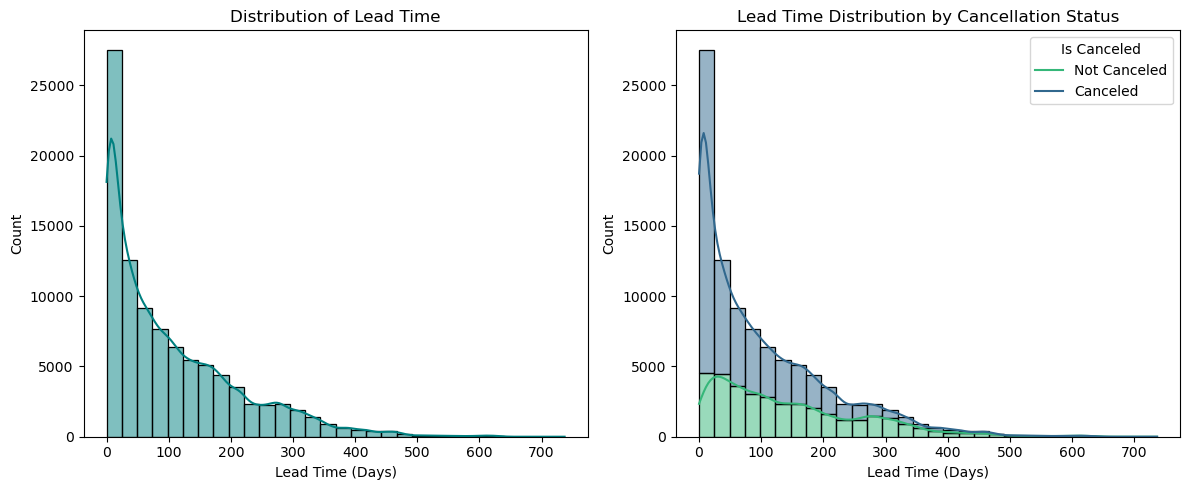

In [99]:
# Visualize the lead time distribution

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='lead_time', bins=30, kde=True, color='teal')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='lead_time', hue='is_canceled', bins=30, kde=True, palette='viridis', multiple='stack')
plt.title('Lead Time Distribution by Cancellation Status')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

In [100]:
# Perform log transform on lead time
train['log_lead_time'] = np.log1p(train['lead_time'])
valid['log_lead_time'] = np.log1p(valid['lead_time'])
test['log_lead_time'] = np.log1p(test['lead_time'])

## e.) Arrival Datetime

In [101]:
# Convert date related to str format due to splitted from datetime feature
# 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'
train['arrival_date_year'] = train['arrival_date_year'].astype(str)
train['arrival_date_month'] = train['arrival_date_month'].astype(str)
train['arrival_date_week_number'] = train['arrival_date_week_number'].astype(str)
train['arrival_date_day_of_month'] = train['arrival_date_day_of_month'].astype(str)

valid['arrival_date_year'] = valid['arrival_date_year'].astype(str)
valid['arrival_date_month'] = valid['arrival_date_month'].astype(str)
valid['arrival_date_week_number'] = valid['arrival_date_week_number'].astype(str)
valid['arrival_date_day_of_month'] = valid['arrival_date_day_of_month'].astype(str)

test['arrival_date_year'] = test['arrival_date_year'].astype(str)
test['arrival_date_month'] = test['arrival_date_month'].astype(str)
test['arrival_date_week_number'] = test['arrival_date_week_number'].astype(str)
test['arrival_date_day_of_month'] = test['arrival_date_day_of_month'].astype(str)

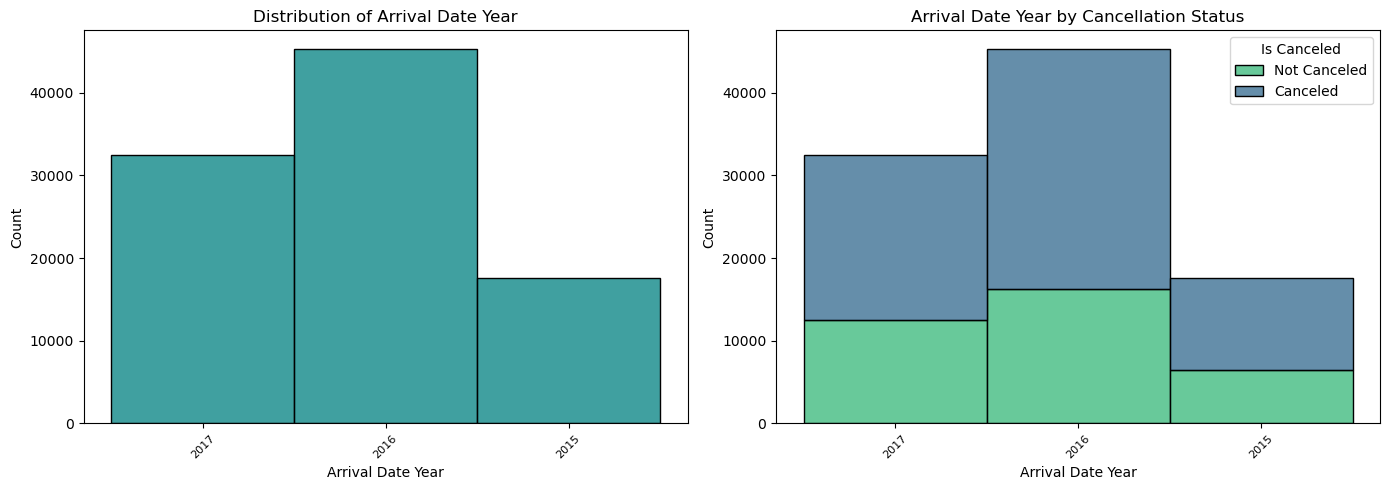

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/3426332065.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette='viridis', order=month_order)


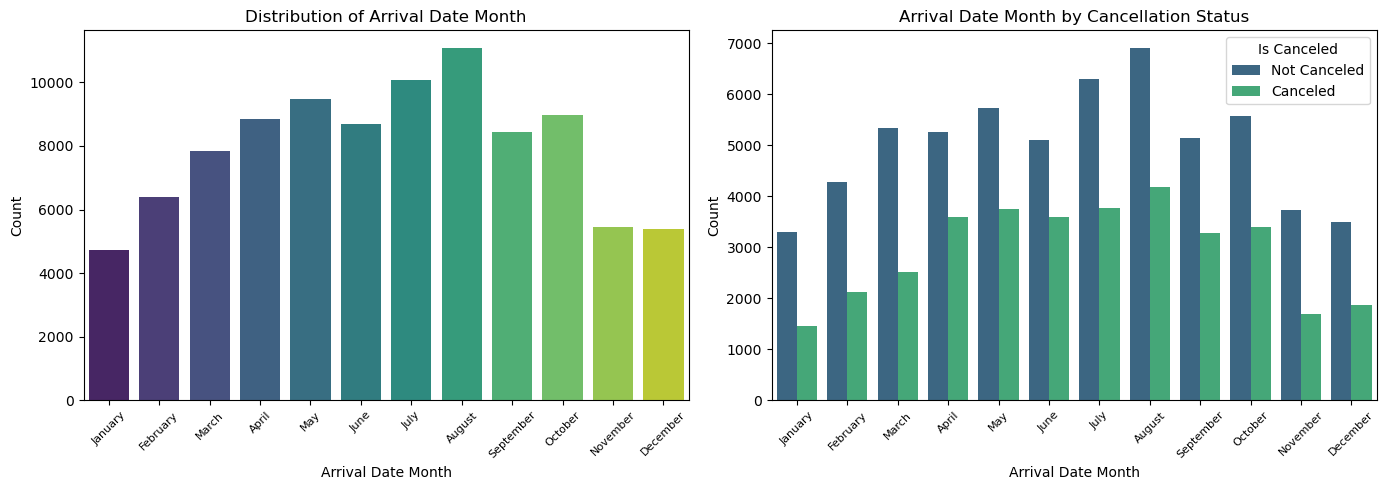

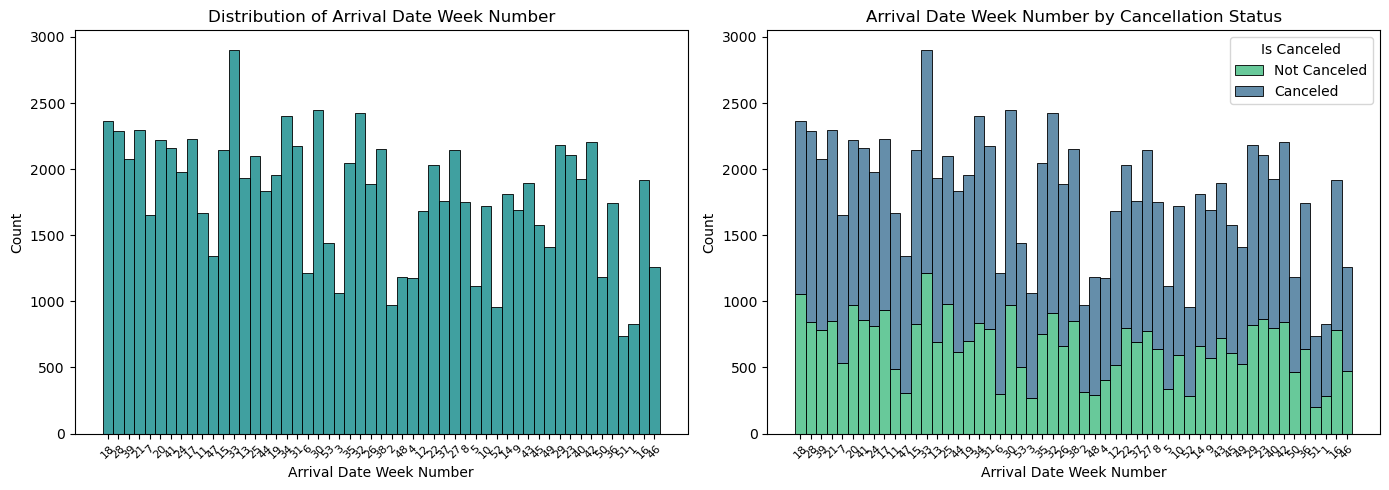

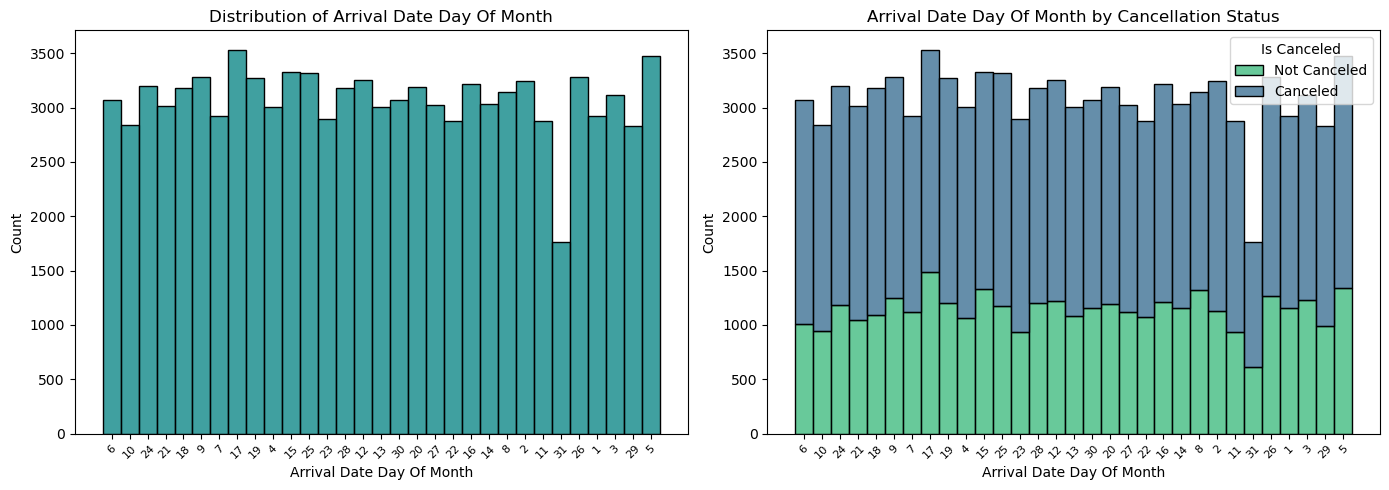

In [102]:
# Visualize Datetime Feature

# List of datetime columns to plot
datetime_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

# Define month order for arrival_date_month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop through each datetime column
for col in datetime_columns:
    # Create a figure with two subplots side by side
    plt.figure(figsize=(14, 5))

    # Subplot 1: Pure distribution
    plt.subplot(1, 2, 1)
    if col == 'arrival_date_month':
        sns.countplot(data=train, x=col, palette='viridis', order=month_order)
    else:
        sns.histplot(data=train, x=col, bins=30, color='teal')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, fontsize = 8)

    # Subplot 2: Distribution by cancellation status
    plt.subplot(1, 2, 2)
    if col == 'arrival_date_month':
        sns.countplot(data=train, x=col, hue='is_canceled', palette='viridis', order=month_order)
    else:
        sns.histplot(data=train, x=col, hue='is_canceled', bins=30, palette='viridis', multiple='stack')
    plt.title(f'{col.replace("_", " ").title()} by Cancellation Status')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, fontsize = 8)
    plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## f.) Number of stay in weekend & weekdays

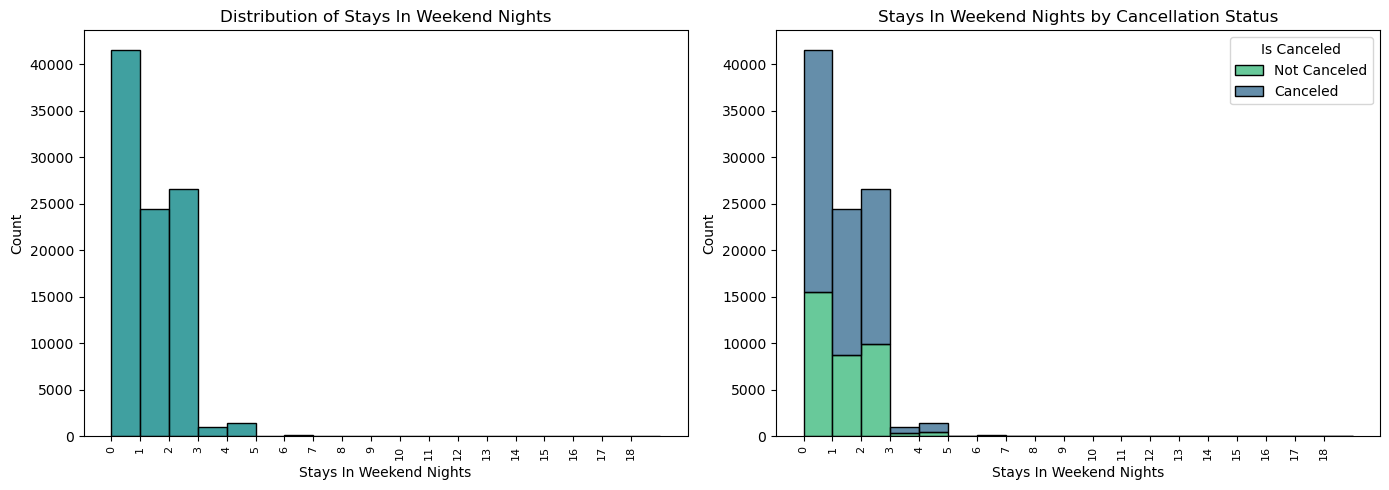

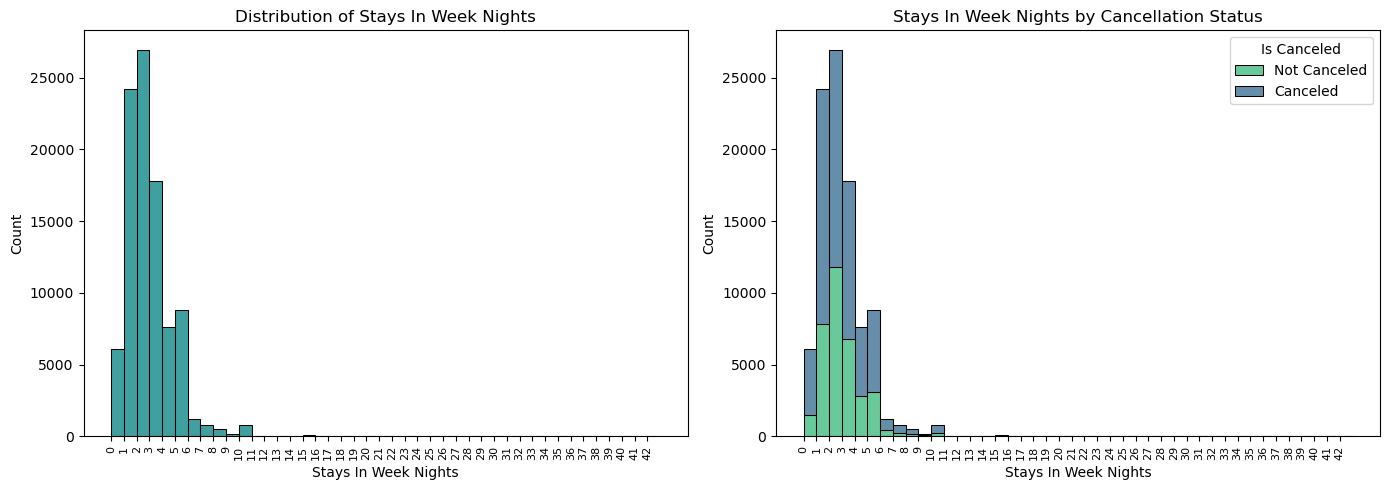

In [103]:
# Visualize number of stays by weekend and weekdays

# List of columns to plot
columns = ['stays_in_weekend_nights', 'stays_in_week_nights']

# Loop through each column
for col in columns:
    # Create a figure with two subplots side by side
    plt.figure(figsize=(14, 5))

    # Subplot 1: Pure distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=train, x=col, bins=range(train[col].max() + 2), color='teal')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(range(train[col].max() + 1), rotation = 90, fontsize = 8)  # Ensure integer ticks

    # Subplot 2: Distribution by cancellation status
    plt.subplot(1, 2, 2)
    sns.histplot(data=train, x=col, hue='is_canceled', bins=range(train[col].max() + 2), palette='viridis', multiple='stack')
    plt.title(f'{col.replace("_", " ").title()} by Cancellation Status')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(range(train[col].max() + 1), rotation = 90, fontsize = 8)  # Ensure integer ticks
    plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## g.) Number of Occupants (Adults, Children, Babies)

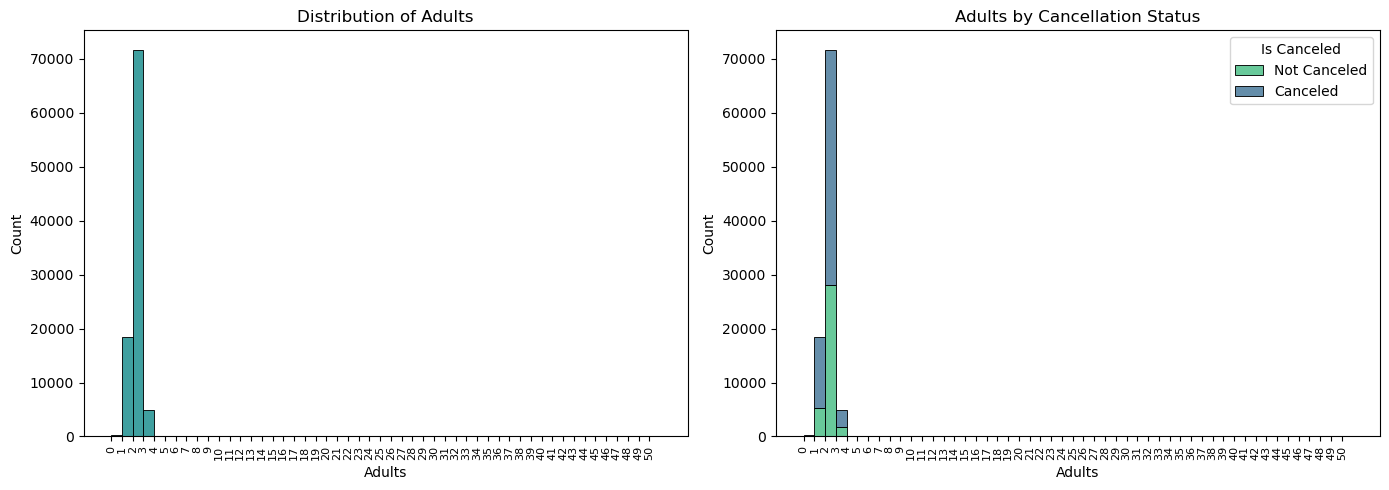

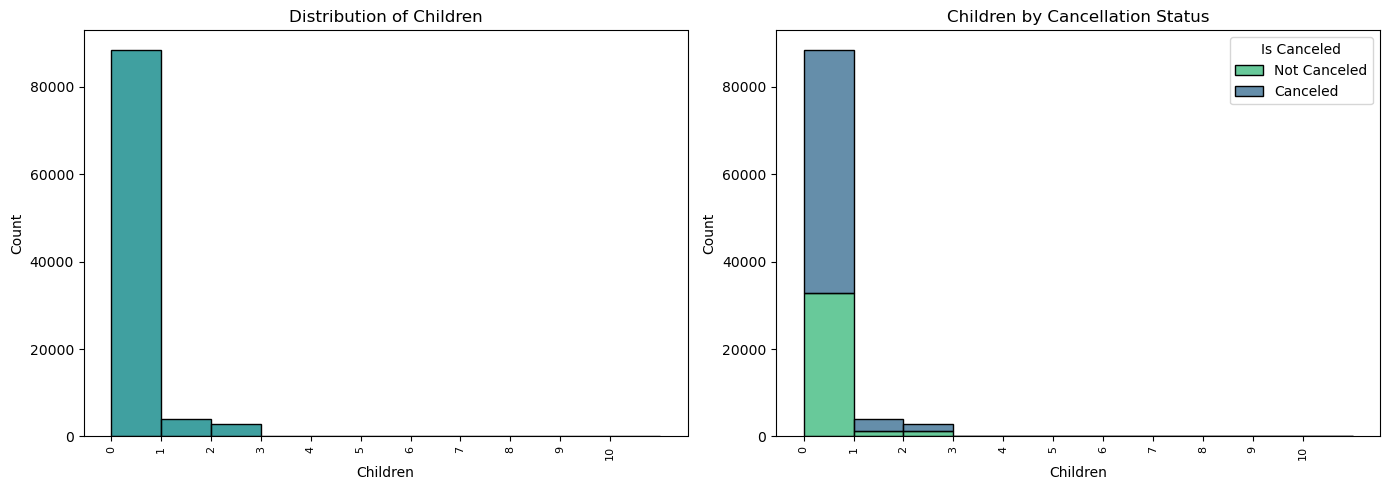

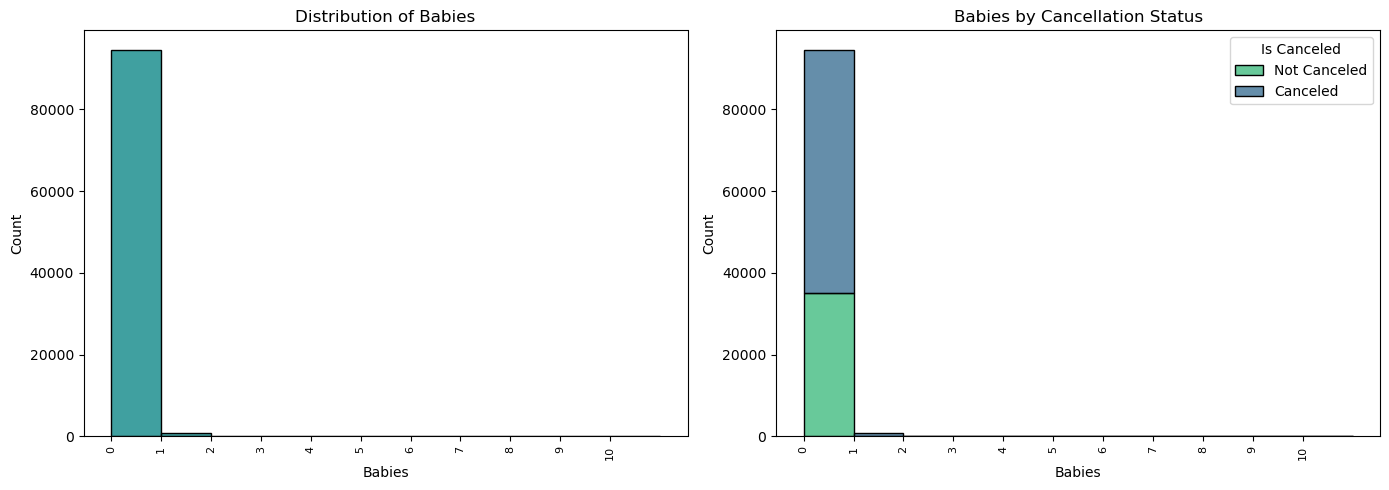

In [104]:
# List of columns to plot
columns = ['adults', 'children', 'babies']

# Loop through each column
for col in columns:
    # Create a figure with two subplots side by side
    plt.figure(figsize=(14, 5))

    # Subplot 1: Pure distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=train, x=col, bins=range(int(train[col].max()) + 2), color='teal')
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(range(int(train[col].max()) + 1), rotation = 90, fontsize = 8)  # Integer ticks for counts

    # Subplot 2: Distribution by cancellation status
    plt.subplot(1, 2, 2)
    sns.histplot(data=train, x=col, hue='is_canceled', bins=range(int(train[col].max()) + 2), palette='viridis', multiple='stack')
    plt.title(f'{col.title()} by Cancellation Status')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(range(int(train[col].max()) + 1), rotation = 90, fontsize = 8)  # Integer ticks
    plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [105]:
# Manual Remove outlier
train = train[(train['adults'] <= 5) & (train['children'] <= 5) & (train['babies'] <= 2)]
valid = valid[(valid['adults'] <= 5) & (valid['children'] <= 5) & (valid['babies'] <= 2)]
test = test[(test['adults'] <= 5) & (test['children'] <= 5) & (test['babies'] <= 2)]

## h.) Meal

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/1097777634.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='meal', palette='viridis')


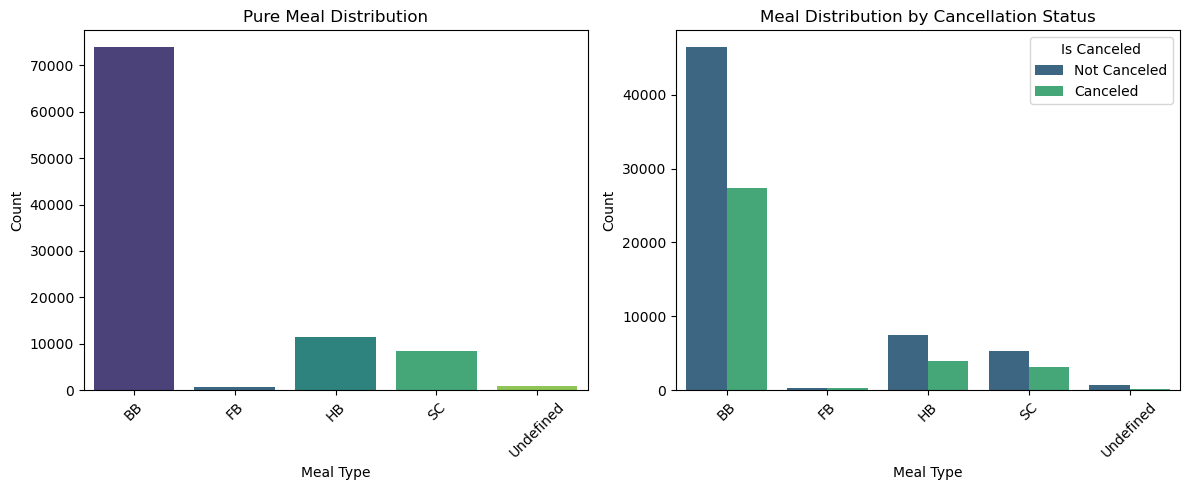

In [106]:
# Visualize the meal distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='meal', palette='viridis')
plt.title('Pure Meal Distribution')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='meal', hue='is_canceled', palette='viridis')
plt.title('Meal Distribution by Cancellation Status')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [107]:
# Replace undefined with SC
train['meal'] = train['meal'].replace('Undefined', 'SC')
valid['meal'] = valid['meal'].replace('Undefined', 'SC')
test['meal'] = test['meal'].replace('Undefined', 'SC')

## i.) Country

In [108]:
# View the uniqueness of country feature
train['country'].unique()

array(['GBR', 'FRA', 'ESP', 'PRT', 'CHN', 'IRL', nan, 'BEL', 'CN', 'ROU',
       'TUR', 'BRA', 'HUN', 'SWE', 'ITA', 'NLD', 'DEU', 'GRC', 'BGR',
       'CHE', 'AUS', 'ISR', 'SRB', 'USA', 'POL', 'JPN', 'JEY', 'LUX',
       'KOR', 'FIN', 'EGY', 'DNK', 'NOR', 'MEX', 'CHL', 'CZE', 'IND',
       'LTU', 'RUS', 'KAZ', 'HKG', 'MAR', 'AUT', 'ARG', 'FRO', 'MOZ',
       'TWN', 'TJK', 'AGO', 'HRV', 'EST', 'BLR', 'JOR', 'GIB', 'CYP',
       'AND', 'ECU', 'LBN', 'ZAF', 'THA', 'SVN', 'ISL', 'MDV', 'DZA',
       'ALB', 'DJI', 'NZL', 'CUB', 'IRN', 'SVK', 'BHR', 'SAU', 'IMN',
       'MRT', 'PAK', 'ARE', 'PRI', 'GTM', 'GEO', 'OMN', 'PHL', 'LVA',
       'PAN', 'VNM', 'MCO', 'PER', 'ASM', 'URY', 'VEN', 'TUN', 'ARM',
       'ZWE', 'KWT', 'CPV', 'SGP', 'UKR', 'MAC', 'COL', 'CRI', 'MKD',
       'LBY', 'IDN', 'LAO', 'MLT', 'SMR', 'PLW', 'JAM', 'AZE', 'UMI',
       'KHM', 'GNB', 'BIH', 'ABW', 'DOM', 'KNA', 'COM', 'CMR', 'SEN',
       'NIC', 'IRQ', 'UZB', 'NGA', 'LKA', 'BEN', 'BFA', 'SUR', 'ATF',
       'BGD', 'L

In [109]:
# Check top 10 country with highest booking
origin_guests = train[train['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_guests.columns = ['country', 'No of guests']
origin_guests.head(10)

,country,No of guests
0,PRT,16808
1,GBR,7727
2,FRA,6794
3,ESP,5134
4,DEU,4871
5,IRL,1997
6,ITA,1968
7,BEL,1527
8,NLD,1378
9,USA,1306


In [110]:
# Check top 10 country with highest cancellation
origin_guests = train[train['is_canceled'] == 1]['country'].value_counts().reset_index()
origin_guests.columns = ['country', 'No of guests']
origin_guests.head(10)

,country,No of guests
0,PRT,21852
1,GBR,1940
2,ESP,1723
3,FRA,1577
4,ITA,1088
5,DEU,977
6,IRL,672
7,BRA,627
8,USA,414
9,BEL,393


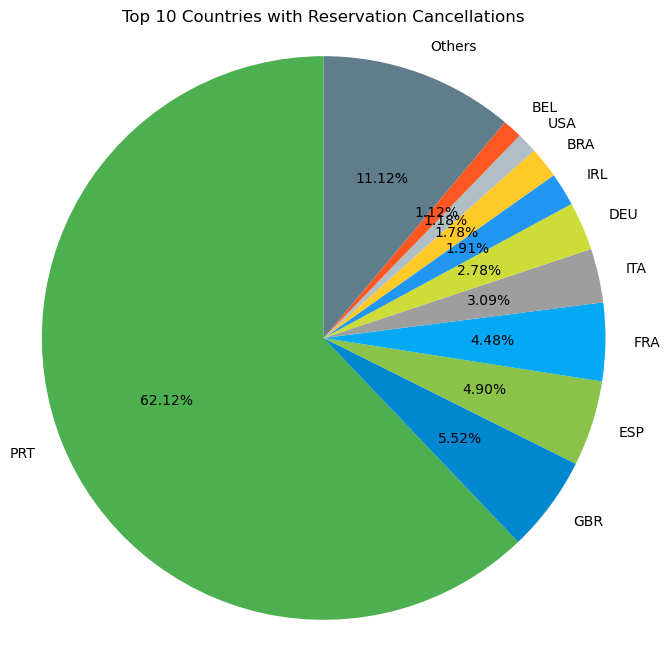

In [111]:
# Visualization Percentage Cancellation by Country
cancelled_data = train[train['is_canceled'] == 1]
all_country_counts = cancelled_data['country'].value_counts()

# Get top 10 countries
top_10_country = all_country_counts[:10]

# Calculate the sum of cancellations for the rest (Others)
others_count = all_country_counts[10:].sum()
top_10_with_others = pd.concat([top_10_country, pd.Series({'Others': others_count})])

# Custom colors for the pie chart (11 colors to include Others)
custom_colors = ['#4CAF50', '#0288D1', '#8BC34A', '#03A9F4', '#9E9E9E', '#CDDC39', 
                 '#2196F3', '#FFCA28', '#B0BEC5', '#FF5722', '#607D8B']

# Create figure and set facecolor correctly
plt.figure(figsize=(8, 8), facecolor='white')  # Light brown background
plt.title('Top 10 Countries with Reservation Cancellations', color="black")
plt.pie(top_10_with_others, autopct='%.2f%%', labels=top_10_with_others.index, colors=custom_colors[:11], startangle=90)
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

In [112]:
# Handle missing values
train['country'] = train['country'].fillna('Unknown')
valid['country'] = valid['country'].fillna('Unknown')
test['country'] = test['country'].fillna('Unknown')

## j.) Market Segment

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/3535486667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='market_segment', palette='viridis')


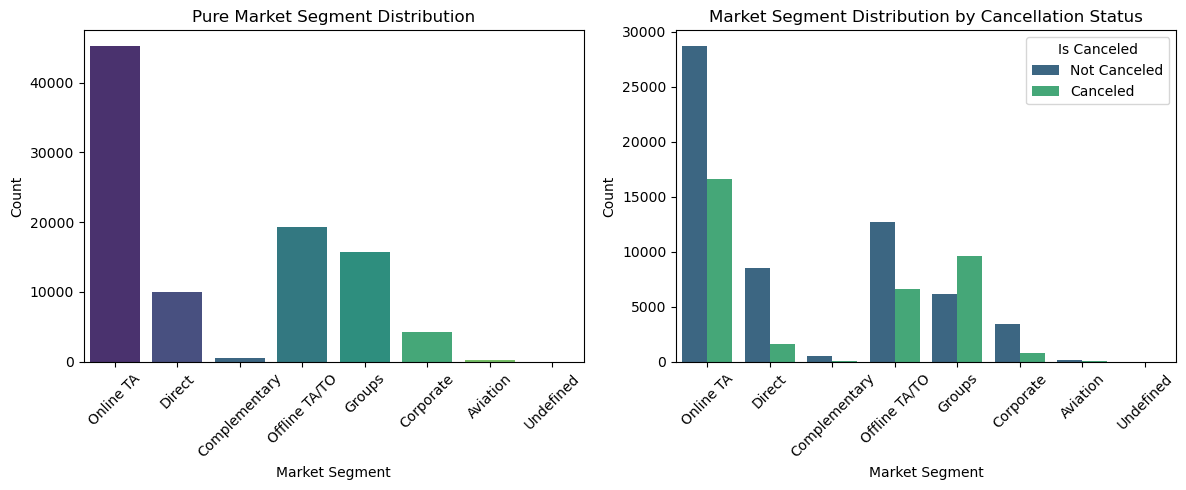

In [113]:
# Visualize the market segment distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='market_segment', palette='viridis')
plt.title('Pure Market Segment Distribution')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='market_segment', hue='is_canceled', palette='viridis')
plt.title('Market Segment Distribution by Cancellation Status')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## k.) Distribution Channel

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/2275179504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='distribution_channel', palette='viridis')


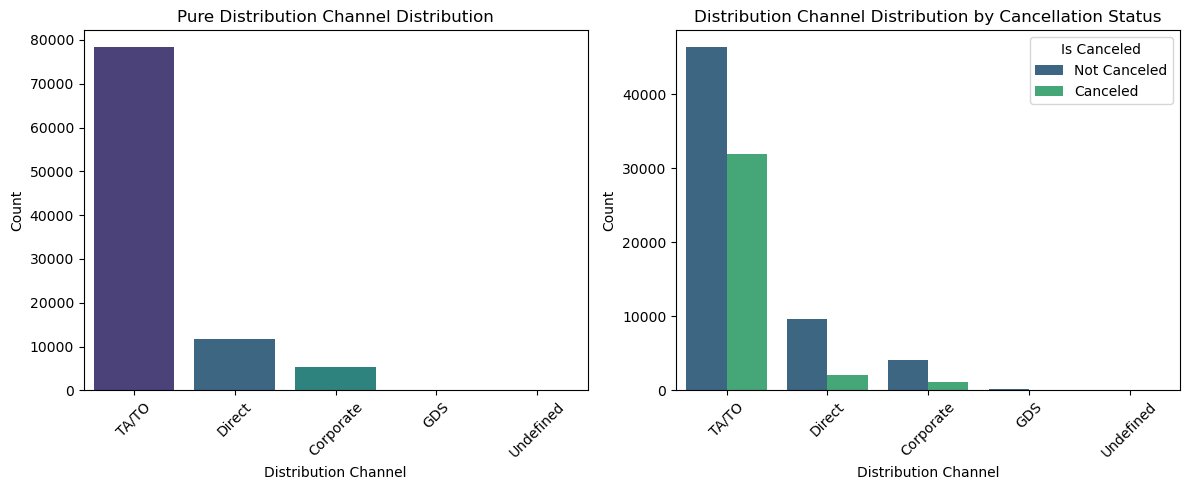

In [114]:
# Visualize the distribution channel distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='distribution_channel', palette='viridis')
plt.title('Pure Distribution Channel Distribution')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='distribution_channel', hue='is_canceled', palette='viridis')
plt.title('Distribution Channel Distribution by Cancellation Status')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## l.) Repeated Guest

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/3579814469.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='is_repeated_guest', palette='viridis')


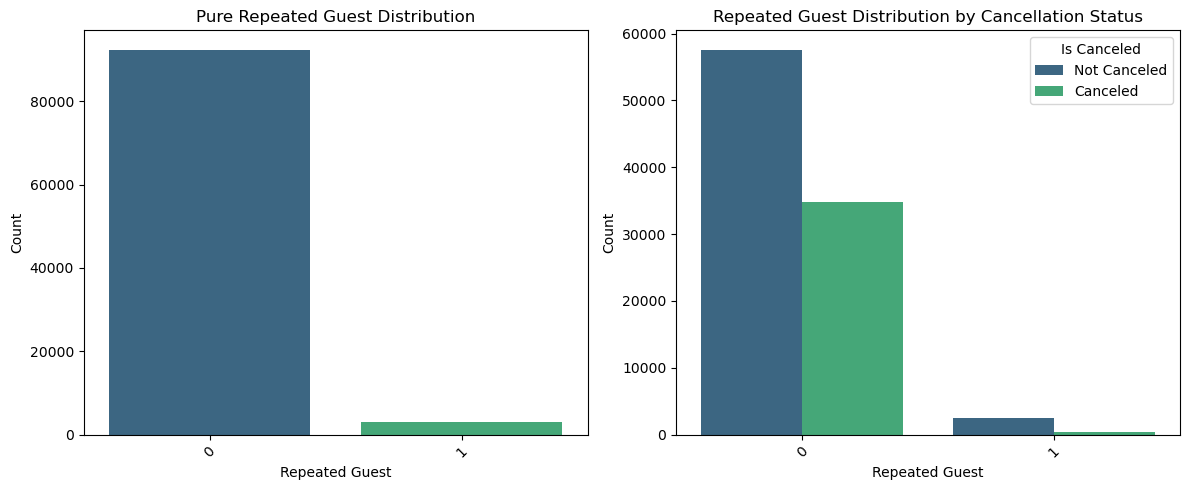

In [115]:
# Visualize the repeated guest distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='is_repeated_guest', palette='viridis')
plt.title('Pure Repeated Guest Distribution')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='is_repeated_guest', hue='is_canceled', palette='viridis')
plt.title('Repeated Guest Distribution by Cancellation Status')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## m.) Previous Cancellation

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/1171068768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='previous_cancellations', palette='viridis')


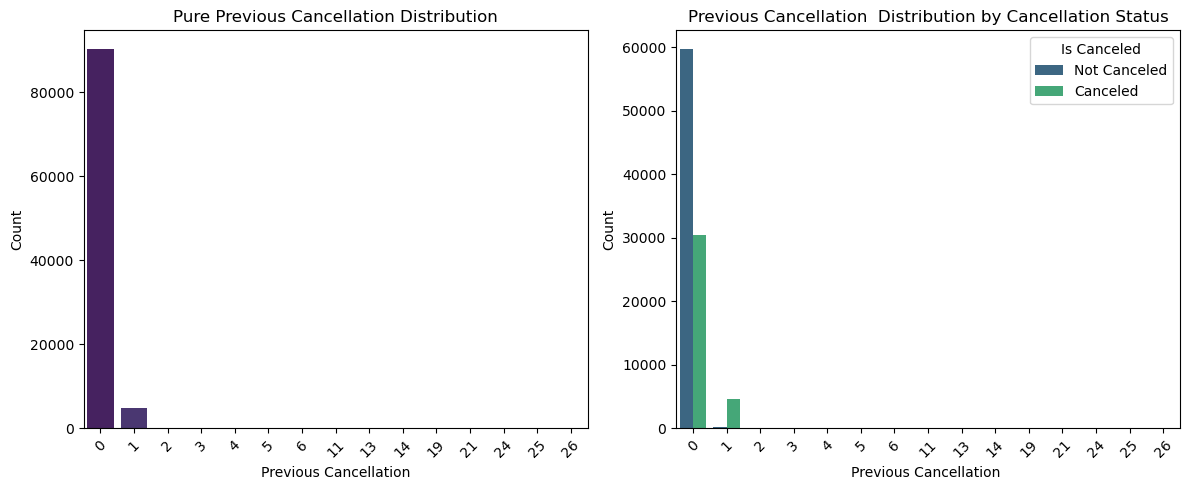

In [116]:
# Visualize the previous cancellation distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='previous_cancellations', palette='viridis')
plt.title('Pure Previous Cancellation Distribution')
plt.xlabel('Previous Cancellation')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='previous_cancellations', hue='is_canceled', palette='viridis')
plt.title('Previous Cancellation  Distribution by Cancellation Status')
plt.xlabel('Previous Cancellation ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [117]:
# Manual Remove outlier
train = train[(train['previous_cancellations'] <= 1)]
valid = valid[(valid['previous_cancellations'] <= 1)]
test = test[(test['previous_cancellations'] <= 1)]

## n.) Previous Bookings not Canceled

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/3096483271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='previous_bookings_not_canceled', palette='viridis')


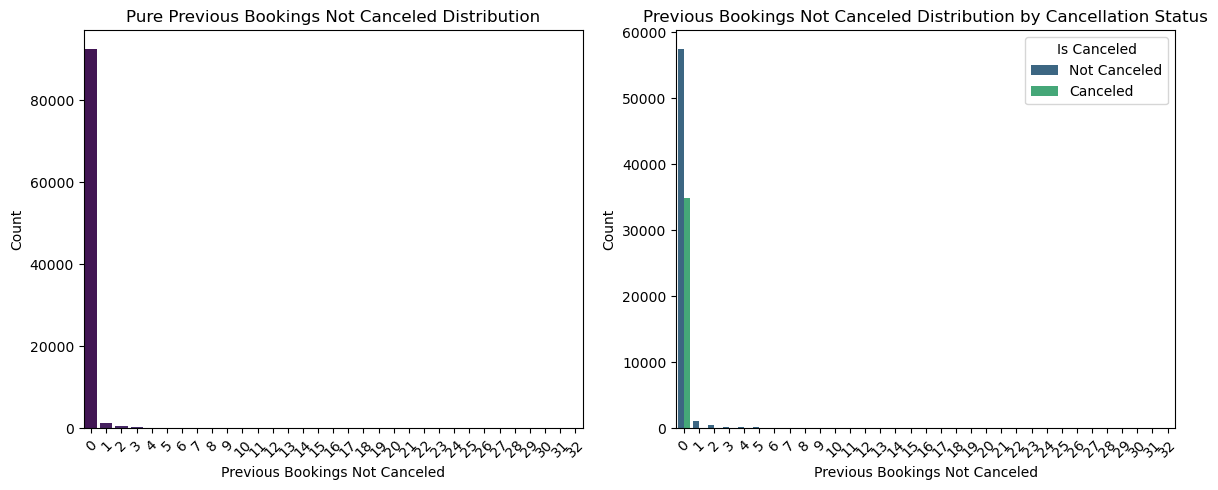

In [118]:
# Visualize the previous booking not canceled distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='previous_bookings_not_canceled', palette='viridis')
plt.title('Pure Previous Bookings Not Canceled Distribution')
plt.xlabel('Previous Bookings Not Canceled')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='previous_bookings_not_canceled', hue='is_canceled', palette='viridis')
plt.title('Previous Bookings Not Canceled Distribution by Cancellation Status')
plt.xlabel('Previous Bookings Not Canceled')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [119]:
# Manual Remove outlier
train = train[(train['previous_bookings_not_canceled'] <= 5)]
valid = valid[(valid['previous_bookings_not_canceled'] <= 5)]
test = test[(test['previous_bookings_not_canceled'] <= 5)]

## o.) Reserved & Assigned Room Type

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/791701369.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette='viridis', order=order)


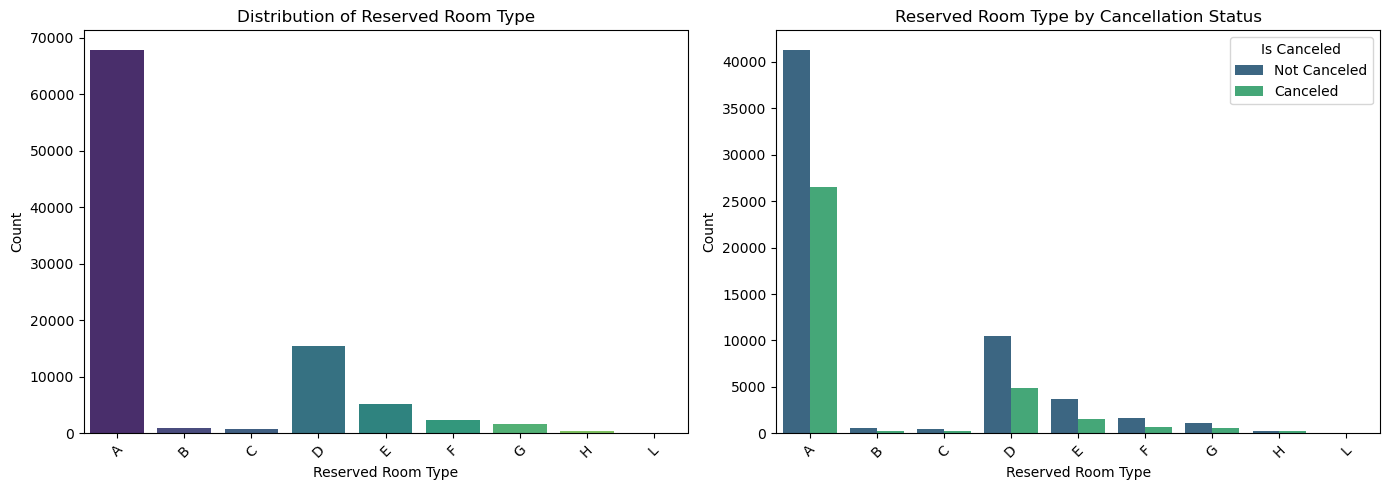

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/791701369.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette='viridis', order=order)


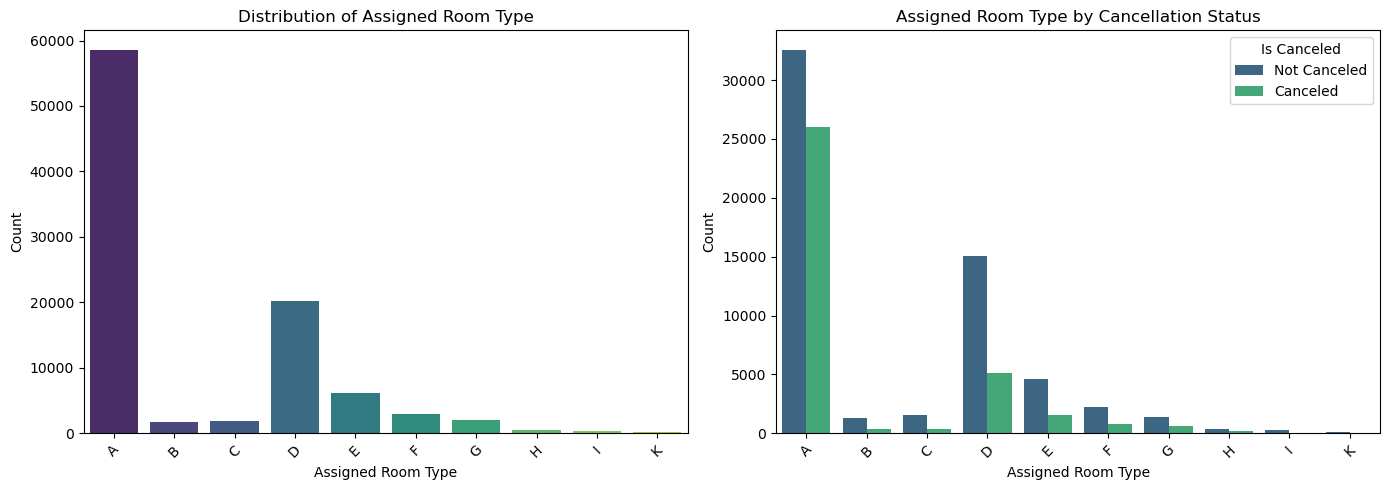

In [120]:

# List of columns to plot
columns = ['reserved_room_type', 'assigned_room_type']


# Loop through each column
for col in columns:
    # Create a figure with two subplots side by side
    plt.figure(figsize=(14, 5))

    # Subplot 1: Pure distribution
    plt.subplot(1, 2, 1)
    order = sorted(train[col].unique())  # Alphabetical order
    sns.countplot(data=train, x=col, palette='viridis', order=order)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Subplot 2: Distribution by cancellation status
    plt.subplot(1, 2, 2)
    sns.countplot(data=train, x=col, hue='is_canceled', palette='viridis', order=order)
    plt.title(f'{col.replace("_", " ").title()} by Cancellation Status')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## p.) Booking Changes 

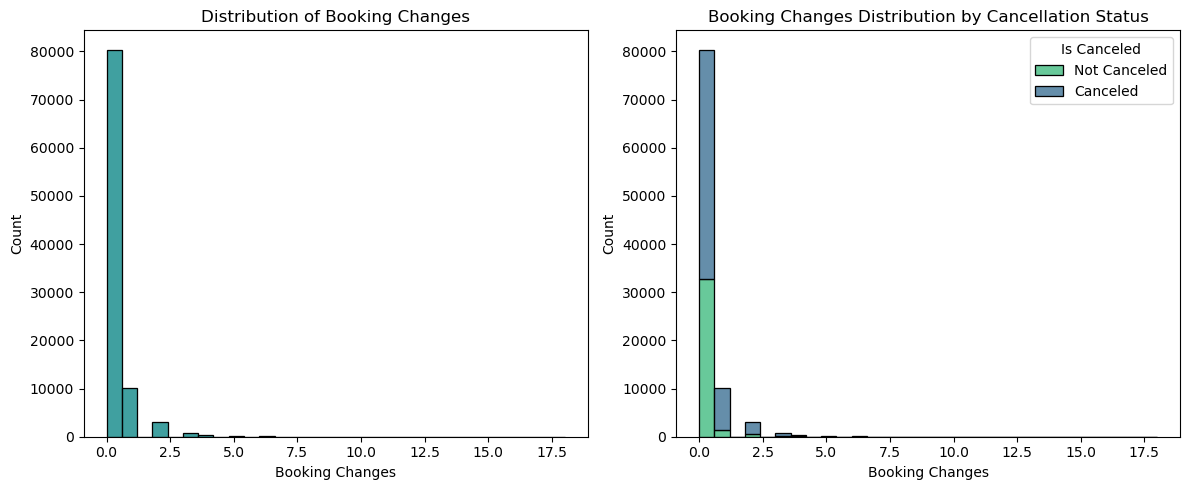

In [121]:
# Visualize the booking changes distribution

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='booking_changes', bins=30, color='teal')
plt.title('Distribution of Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='booking_changes', hue='is_canceled', bins=30, palette='viridis', multiple='stack')
plt.title('Booking Changes Distribution by Cancellation Status')
plt.xlabel('Booking Changes')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

In [122]:
# Manual Remove outlier
train = train[(train['booking_changes'] <= 3)]
valid = valid[(valid['booking_changes'] <= 3)]
test = test[(test['booking_changes'] <= 3)]

## q.) Deposit Type

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/1690250872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='deposit_type', palette='viridis')


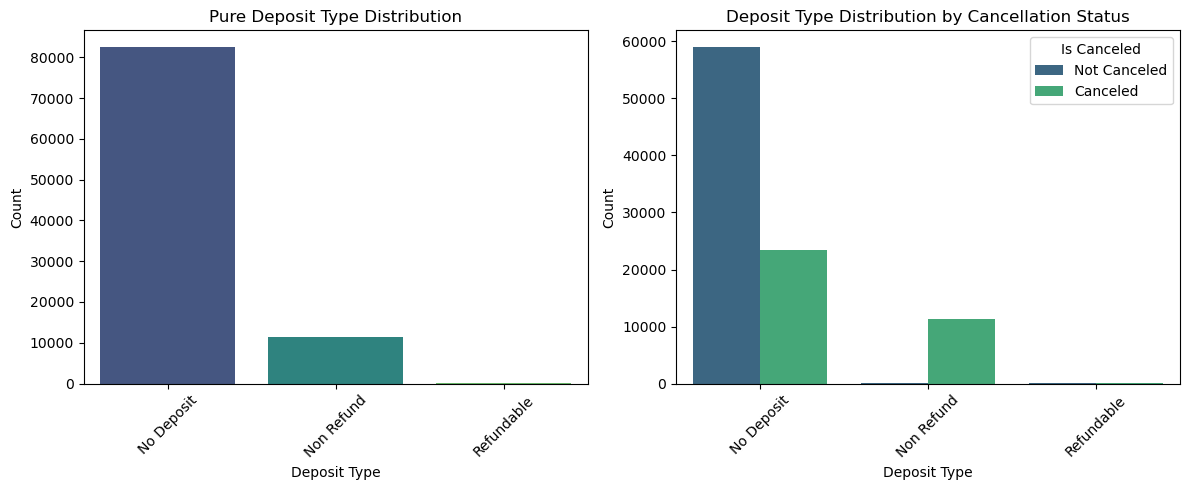

In [123]:
# Visualize the deposit type distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='deposit_type', palette='viridis')
plt.title('Pure Deposit Type Distribution')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='deposit_type', hue='is_canceled', palette='viridis')
plt.title('Deposit Type Distribution by Cancellation Status')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

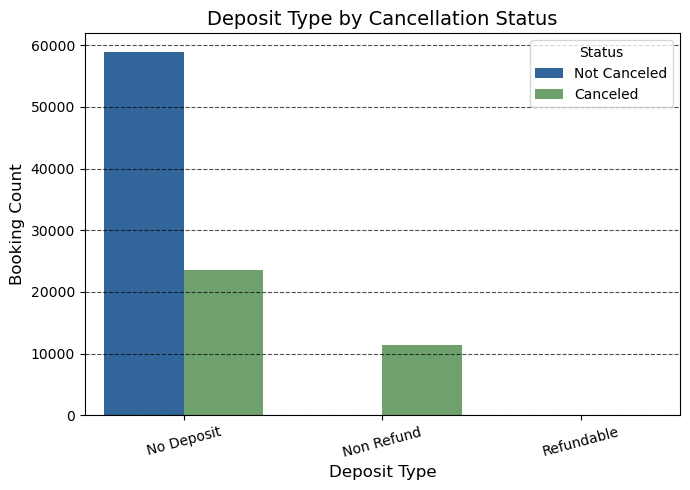

In [124]:
# Set the background color to match your revenue plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')  # Gold/brown background

# Define custom colors for "Not Canceled" (blue) and "Canceled" (green)
custom_palette = {0: '#2166ac', 1: '#67a966'}  # 0: Not Canceled, 1: Canceled

# Plot deposit type by cancellation status
sns.countplot(
    data=train,
    x='deposit_type',
    hue='is_canceled',
    palette=custom_palette,
    ax=ax
)

# Titles and labels
ax.set_title('Deposit Type by Cancellation Status', fontsize=14)
ax.set_xlabel('Deposit Type', fontsize=12)
ax.set_ylabel('Booking Count', fontsize=12)
ax.set_facecolor('white')  # Match subplot background

# Legend
ax.legend(title='Status', labels=['Not Canceled', 'Canceled'])
ax.grid(axis='y', linestyle='--', alpha=0.7, color = 'black')

# Rotate x labels for clarity
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


In [125]:
train[train['is_canceled'] == 1].groupby(['deposit_type'])['adr'].agg('mean')

deposit_type
No Deposit    112.711811
Non Refund     90.210641
Refundable    107.560937
Name: adr, dtype: float64

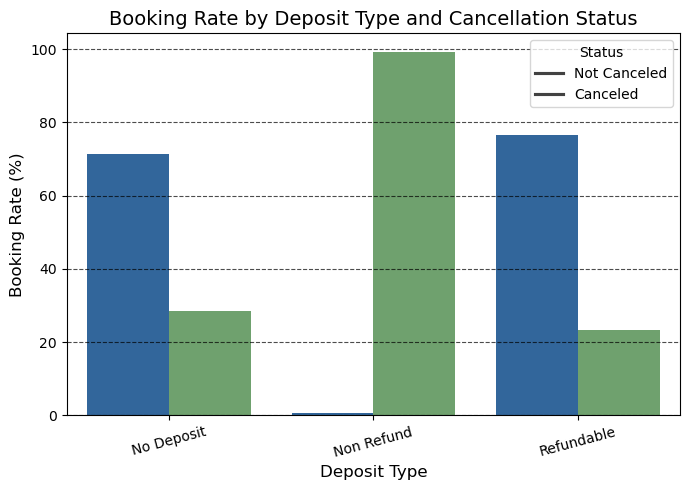

In [126]:
# Calculate the number of bookings per deposit type and cancellation status
grouped = train.groupby(['deposit_type', 'is_canceled']).size().reset_index(name='count')

# Calculate total bookings per deposit type
totals = train.groupby('deposit_type').size().reset_index(name='total')

# Merge to get total for each deposit type
grouped = grouped.merge(totals, on='deposit_type')

# Calculate rate
grouped['booking_rate'] = grouped['count'] / grouped['total'] * 100

# Set gold background
#plt.style.use('default')
ax.set_facecolor('white')
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')  # Gold background

# Custom colors for status
custom_palette = {0: '#2166ac', 1: '#67a966'}  # 0: Not Canceled, 1: Canceled

# Plot booking rate
sns.barplot(
    data=grouped,
    x='deposit_type',
    y='booking_rate',
    hue='is_canceled',
    palette=custom_palette,
    ax=ax
)


ax.grid(axis='y', linestyle='--', alpha=0.7, color = 'black')
ax.set_title('Booking Rate by Deposit Type and Cancellation Status', fontsize=14)
ax.set_xlabel('Deposit Type', fontsize=12)
ax.set_ylabel('Booking Rate (%)', fontsize=12)
ax.set_facecolor('white')
ax.set_facecolor('white')
ax.legend(title='Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## r.) Days in Waiting List

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/2646959507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='days_in_waiting_list', palette='viridis')


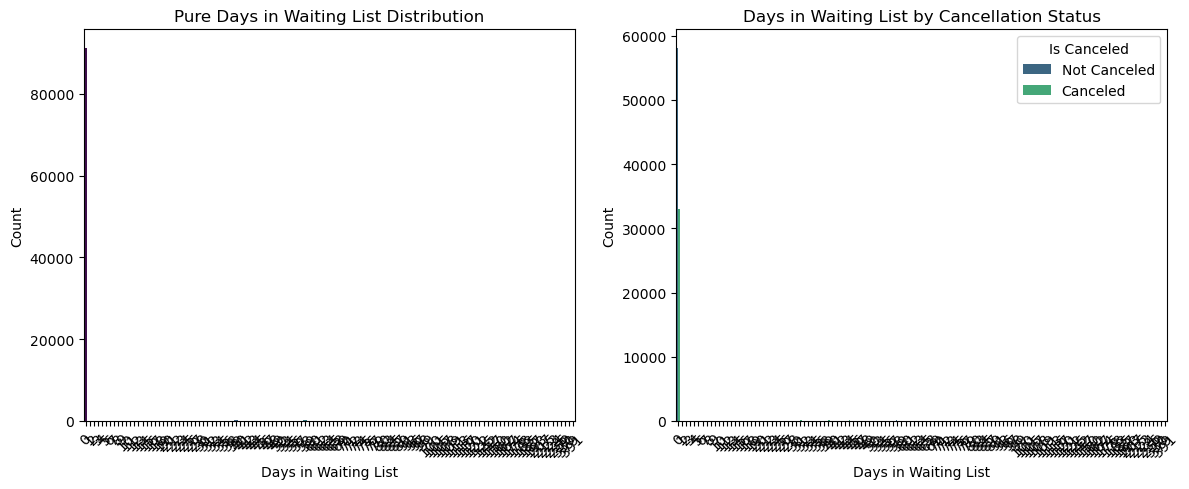

In [127]:
# Visualize the Days in Waiting List distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='days_in_waiting_list', palette='viridis')
plt.title('Pure Days in Waiting List Distribution')
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='days_in_waiting_list', hue='is_canceled', palette='viridis')
plt.title('Days in Waiting List by Cancellation Status')
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [128]:
train['days_in_waiting_list'].value_counts()

days_in_waiting_list
0      91171
39       180
58       139
44       104
31        83
       ...  
30         1
183        1
83         1
74         1
185        1
Name: count, Length: 121, dtype: int64

In [129]:
# Drop Days in Waiting List Feature due to high count are 0
train = train.drop(columns = 'days_in_waiting_list').reset_index(drop = True)
valid = valid.drop(columns = 'days_in_waiting_list').reset_index(drop = True)
test = test.drop(columns = 'days_in_waiting_list').reset_index(drop = True)

## s.) Customer Type

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/1746416627.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='customer_type', palette='viridis')


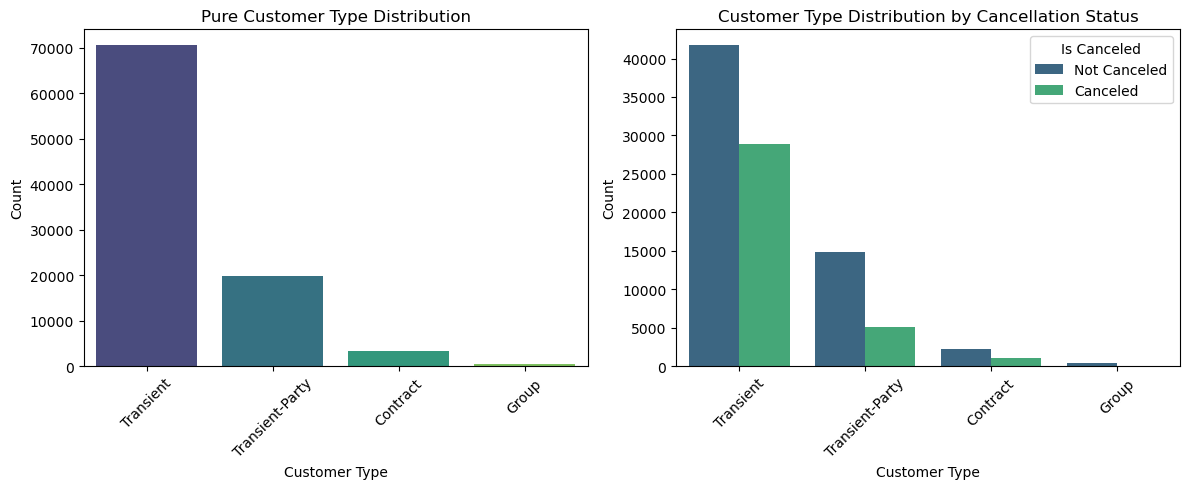

In [130]:
# Visualize the customer type distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='customer_type', palette='viridis')
plt.title('Pure Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='customer_type', hue='is_canceled', palette='viridis')
plt.title('Customer Type Distribution by Cancellation Status')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## t.) Average Daily Rate

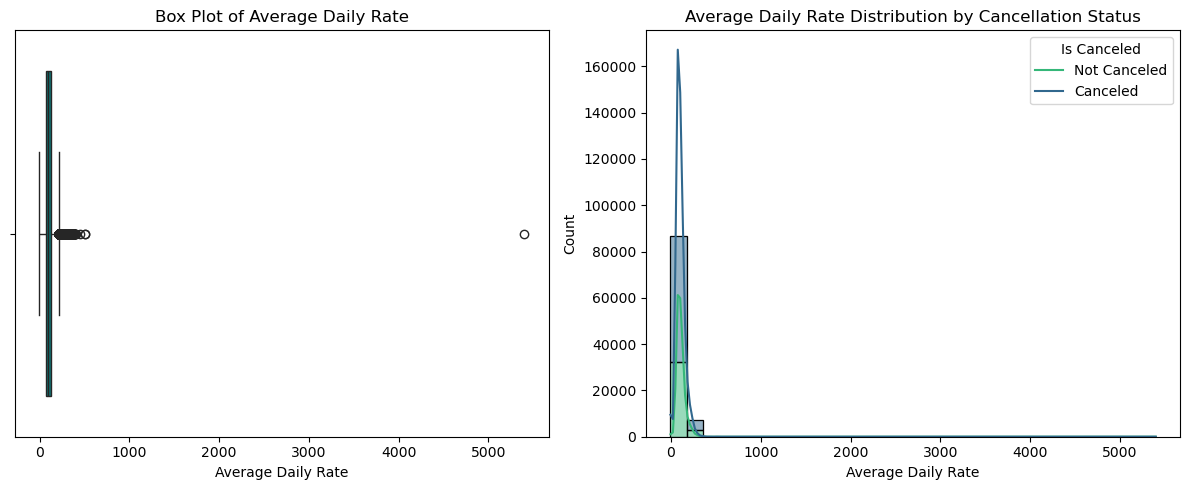

In [131]:
# Visualize the average daily rate distribution

plt.figure(figsize=(12, 5))

# Overall ADR distribution as a boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=train, x='adr', color='teal')
plt.title('Box Plot of Average Daily Rate')
plt.xlabel('Average Daily Rate')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='adr', hue='is_canceled', bins=30, kde=True, palette='viridis', multiple='stack')
plt.title('Average Daily Rate Distribution by Cancellation Status')
plt.xlabel('Average Daily Rate')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

In [132]:
# Manual Remove outlier
train = train[(train['adr'] <= 300)]
valid = valid[(valid['adr'] <= 300)]
test = test[(test['adr'] <= 300)]

## u.) Required Car Parking Spaces

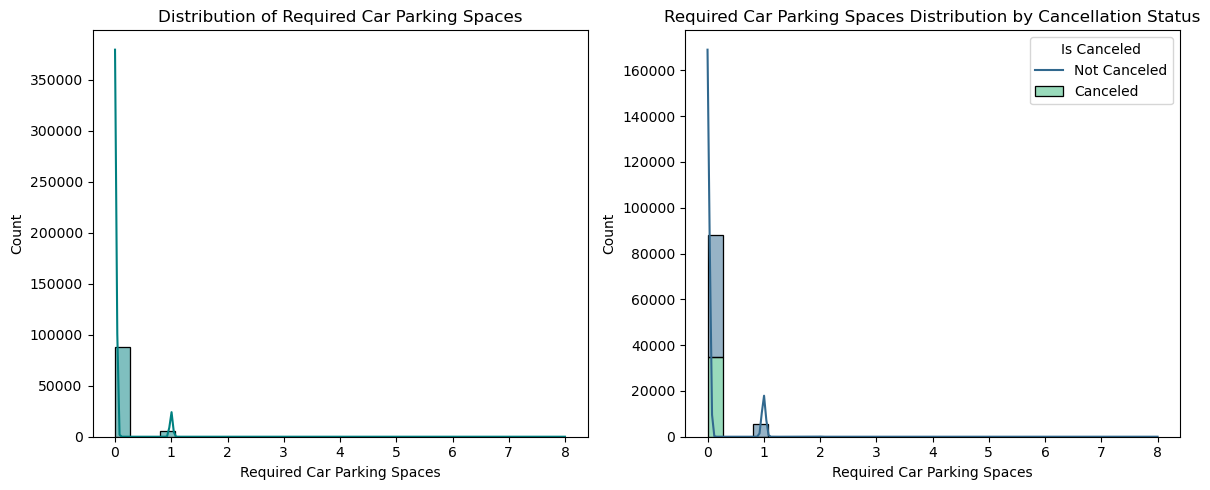

In [133]:
# Visualize the Required Car Parking Spaces distribution

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='required_car_parking_spaces', bins=30, kde=True, color='teal')
plt.title('Distribution of Required Car Parking Spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='required_car_parking_spaces', hue='is_canceled', bins=30, kde=True, palette='viridis', multiple='stack')
plt.title('Required Car Parking Spaces Distribution by Cancellation Status')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

In [134]:
# Manual Remove outlier
train = train[(train['required_car_parking_spaces'] <= 1)]
valid = valid[(valid['required_car_parking_spaces'] <= 1)]
test = test[(test['required_car_parking_spaces'] <= 1)]

## v.) Total Special Requests

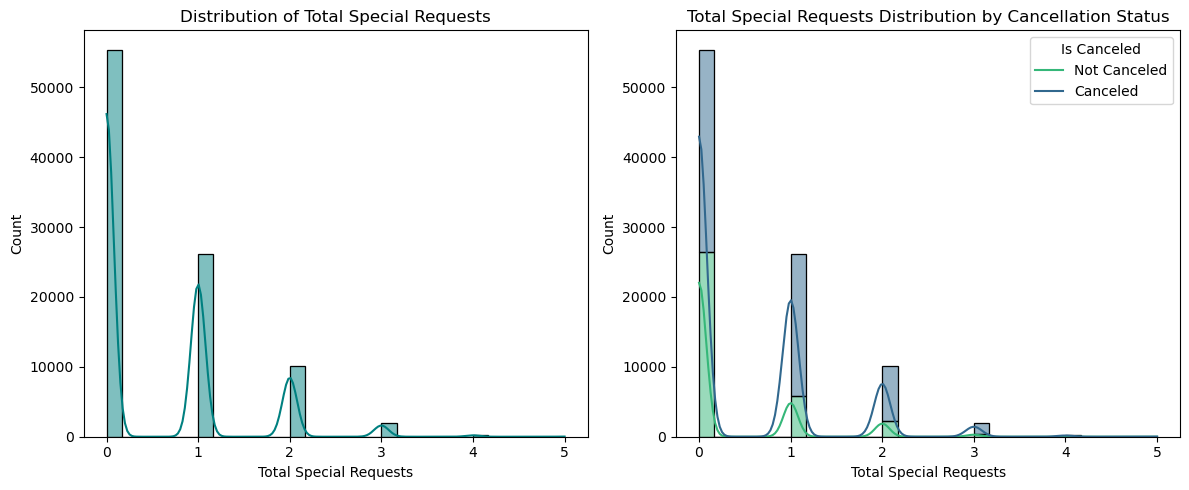

In [135]:
# Visualize the Total Special Requests distribution

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x='total_of_special_requests', bins=30, kde=True, color='teal')
plt.title('Distribution of Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='total_of_special_requests', hue='is_canceled', bins=30, kde=True, palette='viridis', multiple='stack')
plt.title('Total Special Requests Distribution by Cancellation Status')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

In [136]:
# Manual Remove outlier
train = train[(train['total_of_special_requests'] <= 3)]
valid = valid[(valid['total_of_special_requests'] <= 3)]
test = test[(test['total_of_special_requests'] <= 3)]

## w.) Reservation Status

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/586702248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='reservation_status', palette='viridis', order=order)


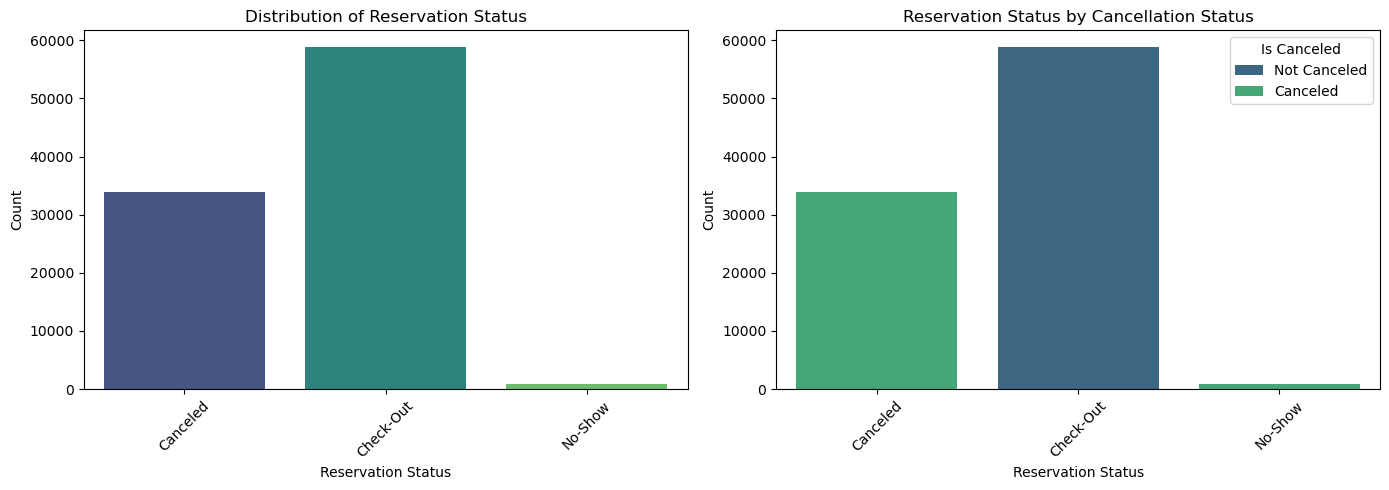

In [137]:
# Visualize Reservation Status Distribution

# Create a figure with two subplots side by side
plt.figure(figsize=(14, 5))

# Subplot 1: Pure distribution
plt.subplot(1, 2, 1)
order = sorted(train['reservation_status'].unique())  # Alphabetical order
sns.countplot(data=train, x='reservation_status', palette='viridis', order=order)
plt.title('Distribution of Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot 2: Distribution by cancellation status
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='reservation_status', hue='is_canceled', palette='viridis', order=order)
plt.title('Reservation Status by Cancellation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Adjust layout and display
plt.tight_layout()
plt.show()

In [138]:
# Drop Reservation status as it reflected on is canceled feature
train = train.drop(columns = 'reservation_status').reset_index(drop = True)
valid = valid.drop(columns = 'reservation_status').reset_index(drop = True)
test = test.drop(columns = 'reservation_status').reset_index(drop = True)

## x.) Reservation Status Date

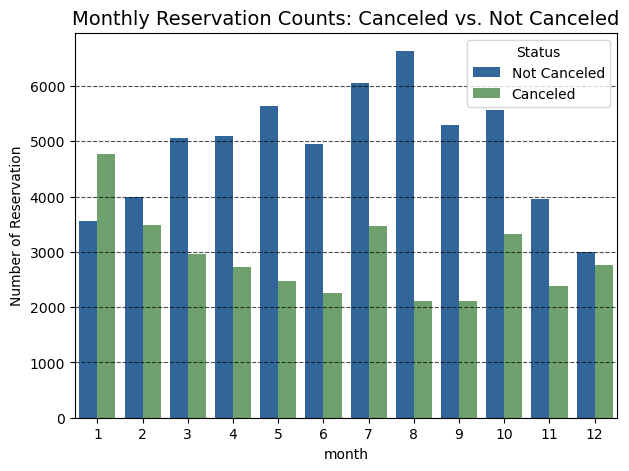

In [139]:
# Visualize Reservation Status Date 
train_copy = train.copy()
train_copy['month']= pd.to_datetime(train['reservation_status_date']).dt.month

# Set the background color to match your revenue plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')  # Gold/brown background

custom_palette = {0: '#2166ac', 1: '#67a966'} 
sns.countplot(x='month', hue='is_canceled', data = train_copy, palette = custom_palette, ax = ax)

# Titles and labels
legend_lebels,_ = ax.get_legend_handles_labels()
ax.set_title('Monthly Reservation Counts: Canceled vs. Not Canceled', size = 14)
ax.set_xlabel('month')
ax.set_ylabel('Number of Reservation')
ax.set_facecolor('white')  # Match subplot background

# Legend
ax.legend(title='Status', labels=['Not Canceled', 'Canceled'])
ax.grid(axis='y', linestyle='--', alpha=0.7, color = 'black')
plt.show()


In [140]:
# Drop Reservation Status Date as Not useful for prediction
train = train.drop(columns = 'reservation_status_date').reset_index(drop = True)
valid = valid.drop(columns = 'reservation_status_date').reset_index(drop = True)
test = test.drop(columns = 'reservation_status_date').reset_index(drop = True)

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93591 entries, 0 to 93590
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           93591 non-null  object 
 1   is_canceled                     93591 non-null  int64  
 2   lead_time                       93591 non-null  int64  
 3   arrival_date_year               93591 non-null  object 
 4   arrival_date_month              93591 non-null  object 
 5   arrival_date_week_number        93591 non-null  object 
 6   arrival_date_day_of_month       93591 non-null  object 
 7   stays_in_weekend_nights         93591 non-null  int64  
 8   stays_in_week_nights            93591 non-null  int64  
 9   adults                          93591 non-null  int64  
 10  children                        93591 non-null  int64  
 11  babies                          93591 non-null  int64  
 12  meal                            

## y.) Correlation Heatmap

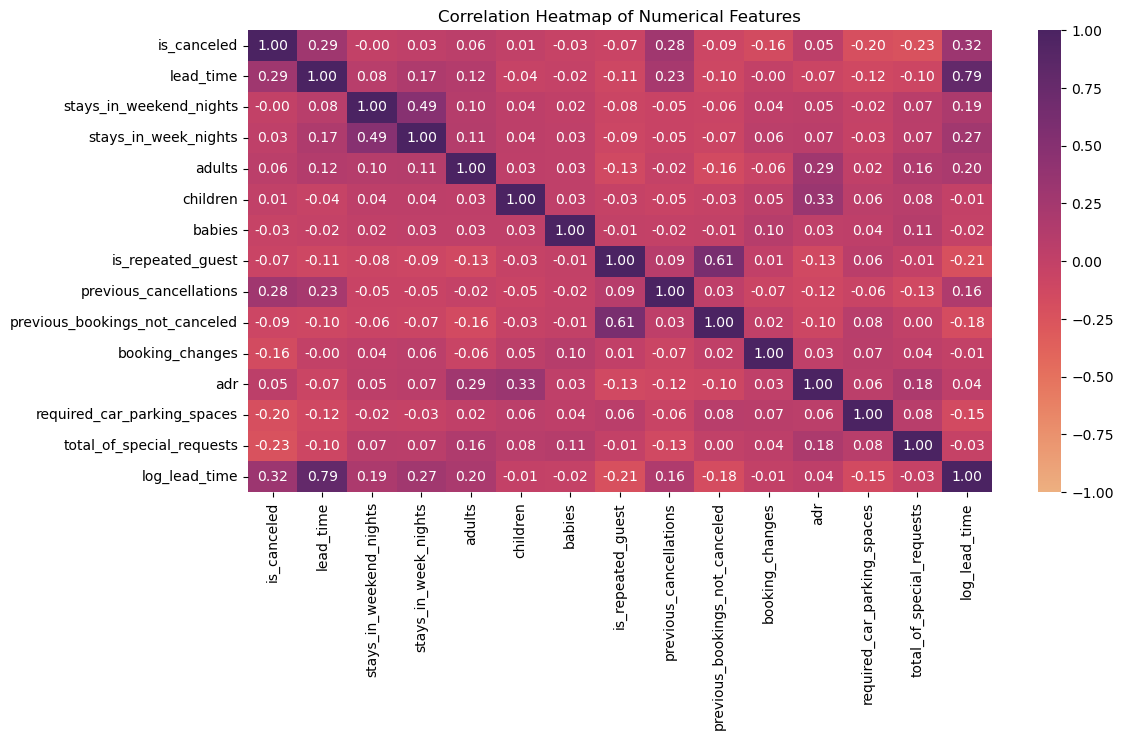

In [142]:
# Select numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
train_numerical = train[numerical_cols]

# Compute correlation matrix
corr_matrix = train_numerical.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

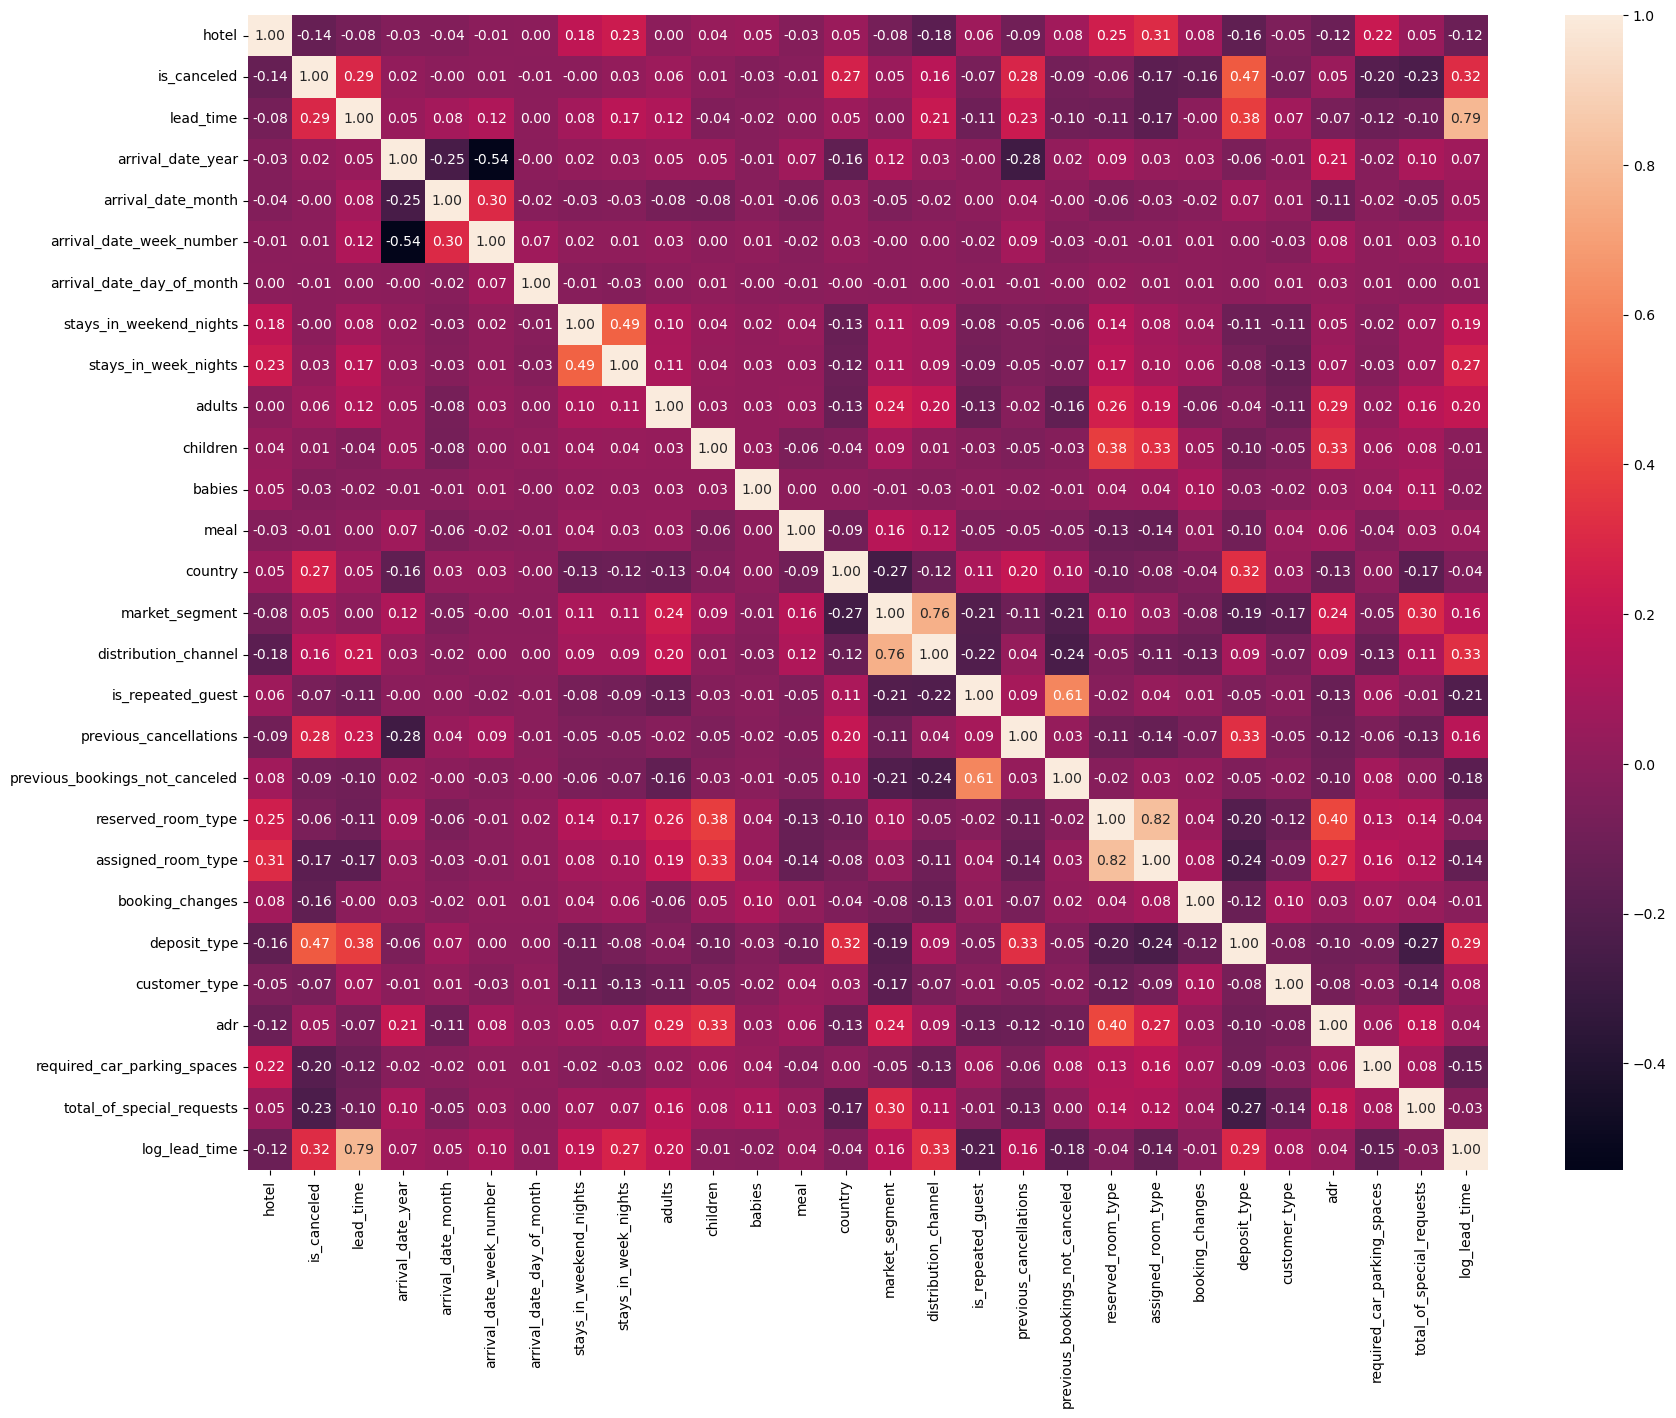

In [143]:
#Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form
train_le = train.copy()
le = LabelEncoder()
categoricals = [
    'arrival_date_month',
    'hotel',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
]
for col in categoricals:
    train_le[col] = le.fit_transform(train_le[col])
    
plt.figure(figsize=(20, 15))
sns.heatmap(train_le.corr(), annot=True, fmt='.2f');

## z.) Monthly Cancellation & Travel Season Cancellation

Unique values in is_canceled: [1 0]
          year_month  cancellation_rate  count
316        2015-July          66.424682   1102
317        2015-July          22.337418   1061
364      2015-August          50.458248   1964
365      2015-August          24.839006   1087
426   2015-September          43.865248   2820
427   2015-September          29.867987   1212
476     2015-October          38.649635   2740
477     2015-October          24.539363   1194
526    2015-November          23.882114    984
527    2015-November          16.947250    891
574    2015-December          39.634146   1312
575    2015-December          23.930754    982
644     2016-January          33.333333   1032
645     2016-January          13.986014    715
694    2016-February          39.839572   1870
695    2016-February          26.520270   1184
754       2016-March          36.676337   2413
755       2016-March          20.605187   1388
792       2016-April          42.918609   2789
793       2016-April    

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/2218884539.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df_temp.groupby(['arrival_date_year', 'arrival_date_month', 'year_month', 'hotel'])['is_canceled'].agg(['mean', 'count']).reset_index()


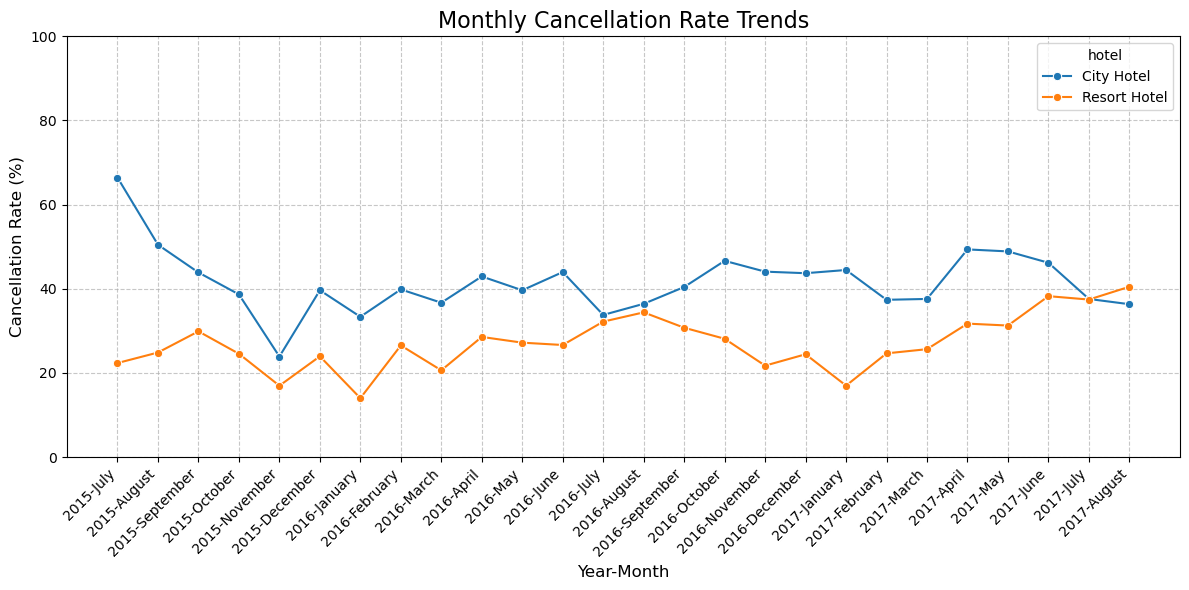

In [144]:
# Create a copy of the dataset
df_temp = train.copy()

# Ensure 'arrival_date_month' is in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df_temp['arrival_date_month'] = pd.Categorical(df_temp['arrival_date_month'], categories=month_order, ordered=True)

# Verify 'is_canceled' is numeric and binary
df_temp['is_canceled'] = df_temp['is_canceled'].astype(int)  # Ensure 0 or 1
print("Unique values in is_canceled:", df_temp['is_canceled'].unique())  # Debug: [1 0]

# Create 'year_month' column (fix: convert categorical month to string)
df_temp['year_month'] = df_temp['arrival_date_year'].astype(str) + '-' + df_temp['arrival_date_month'].astype(str)

# Calculate cancellation rate by year and month, include count to check for empty groups
cancel_rate = df_temp.groupby(['arrival_date_year', 'arrival_date_month', 'year_month', 'hotel'])['is_canceled'].agg(['mean', 'count']).reset_index()
cancel_rate['cancellation_rate'] = cancel_rate['mean'] * 100  # Convert to percentage

# Filter out groups with low counts to avoid unreliable rates
cancel_rate = cancel_rate[cancel_rate['count'] >= 10]  # Require at least 10 bookings

# Sort by year and month for chronological order
cancel_rate = cancel_rate.sort_values(['arrival_date_year', 'arrival_date_month'])

# Map months to seasons
season_mapping = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}
cancel_rate['season'] = cancel_rate['arrival_date_month'].map(season_mapping)

# Print results to verify
print(cancel_rate[['year_month', 'cancellation_rate', 'count']])

# Remove rows with NaN cancellation rates (if any remain)
cancel_rate = cancel_rate.dropna(subset=['cancellation_rate'])

# Plot monthly cancellation rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancel_rate, x='year_month', y='cancellation_rate', hue='hotel', marker='o', color='#4CAF50')
plt.title('Monthly Cancellation Rate Trends', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set y-axis from 0 to 100%
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/7z/4wr97tvs56zf81qsvfk12nhr0000gn/T/ipykernel_26383/1080441951.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = df_temp.groupby(['season', 'hotel']).agg(


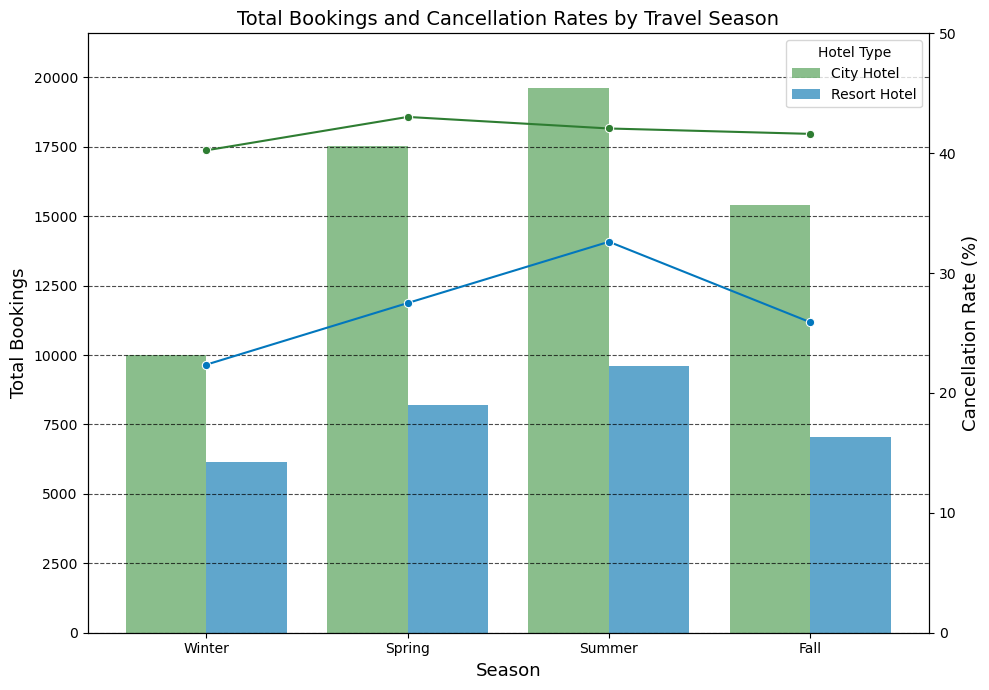

In [145]:
# Create a copy of the dataset
df_temp = train.copy()

# Map months to seasons
season_mapping = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}
df_temp['season'] = df_temp['arrival_date_month'].map(season_mapping)

# Ensure season is categorical with custom order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
df_temp['season'] = pd.Categorical(df_temp['season'], categories=season_order, ordered=True)

# Group by season and hotel to get stats
season_stats = df_temp.groupby(['season', 'hotel']).agg(
    total_bookings=('is_canceled', 'size'),
    cancellation_rate=('is_canceled', 'mean')
).reset_index()
season_stats['cancellation_rate'] = season_stats['cancellation_rate'] * 100

# Set up gold background
plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('white')  # Gold/brown background

# Bar plot for total bookings with new colors
sns.barplot(
    data=season_stats,
    x='season',
    y='total_bookings',
    hue='hotel',
    palette={'City Hotel': '#4CAF50', 'Resort Hotel': '#0288D1'},  # Blue for Resort Hotel
    alpha=0.7,
    ax=ax1
)
ax1.set_ylabel('Total Bookings', fontsize=13)
ax1.set_xlabel('Season', fontsize=13)
ax1.set_ylim(0, season_stats['total_bookings'].max() * 1.1)
ax1.set_facecolor('white')
ax1.grid(axis='y', linestyle='--', alpha=0.7, color = 'black')

# Line plot for cancellation rate (secondary y-axis) with new colors
ax2 = ax1.twinx()
sns.lineplot(
    data=season_stats,
    x='season',
    y='cancellation_rate',
    hue='hotel',
    marker='o',
    palette={'City Hotel': '#2E7D32', 'Resort Hotel': '#0277BD'},  # Darker blue for Resort Hotel
    ax=ax2,
    legend=False
)
ax2.set_ylabel('Cancellation Rate (%)', fontsize=13)
ax2.set_ylim(0, 50)

plt.title('Total Bookings and Cancellation Rates by Travel Season', fontsize=14)
ax1.legend(title='Hotel Type', loc='upper right')
plt.tight_layout()
plt.show()


# Feature Engineering

In [146]:
# Define a feature whether reserved room type same as assigned room type

def compare_rooms(row):
    if row['reserved_room_type'] == row['assigned_room_type']:
        return 1 # the guest a room and assigned to the same room
    elif row['reserved_room_type'] != row['assigned_room_type']:
        return 0 # downgraded or upgraded
    
# creating the room column and add it to the original dataframe
train['room_type_same'] = train.apply(compare_rooms, axis=1)
valid['room_type_same'] = valid.apply(compare_rooms, axis=1)
test['room_type_same'] = test.apply(compare_rooms, axis=1)

train.room_type_same.value_counts()

room_type_same
1    82097
0    11494
Name: count, dtype: int64

In [147]:
# Calculate length of stay
train['length_of_stay'] = train['stays_in_weekend_nights'] + train['stays_in_week_nights']
valid['length_of_stay'] = valid['stays_in_weekend_nights'] + valid['stays_in_week_nights']
test['length_of_stay'] = test['stays_in_weekend_nights'] + test['stays_in_week_nights']


In [148]:
# Create weekeend stay indicator
train['is_weekend'] = train['stays_in_weekend_nights'].apply(lambda x: 1 if x > 0 else 0)
valid['is_weekend'] = valid['stays_in_weekend_nights'].apply(lambda x: 1 if x > 0 else 0)
test['is_weekend'] = test['stays_in_weekend_nights'].apply(lambda x: 1 if x > 0 else 0)


In [149]:
# Summer months is high season in Europe
train['is_high_season'] = train['arrival_date_month'].isin(['June', 'July', 'August']).astype(int)  
valid['is_high_season'] = valid['arrival_date_month'].isin(['June', 'July', 'August']).astype(int)  
test['is_high_season'] = test['arrival_date_month'].isin(['June', 'July', 'August']).astype(int)  

# Create high season month in Portuge and Group into 4 season
train['season'] = train['arrival_date_month'].map({
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
})

valid['season'] = valid['arrival_date_month'].map({
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
})

test['season'] = test['arrival_date_month'].map({
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
})

In [150]:
# Total guest counts
train['total_guests'] = train['adults'] + train['children'] + train['babies']
valid['total_guests'] = valid['adults'] + valid['children'] + valid['babies']
test['total_guests'] = test['adults'] + test['children'] + test['babies']

In [151]:
# SC - Self Catering
# BB - Bed & Breadfast
# HB - Half Board
# FB - Full Board
# Meal cost level feature based on different meal type. Higher meal cost level may correlate to lower cancellation rate
# Due to financial commitment
train['meal_cost_level'] = train['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3})
valid['meal_cost_level'] = valid['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3})
test['meal_cost_level'] = test['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3})

# Guests with meal plans may be more committed, reducing cancellation risk.
train['has_meal_plan'] = (train['meal'] != 'SC').astype(int)
valid['has_meal_plan'] = (valid['meal'] != 'SC').astype(int)
test['has_meal_plan'] = (test['meal'] != 'SC').astype(int)

# Guests with FB and non-refunded deposits are less likely to cancel.
train['meal_deposit_interaction'] = train['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3}) \
    * train['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})
    
valid['meal_deposit_interaction'] = valid['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3}) \
    * valid['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})
    
test['meal_deposit_interaction'] = test['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3}) \
    * test['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})

In [152]:
train['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [153]:
# Non-refunded deposits with long lead times may reduce cancellations
train['deposit_lead_interaction'] = train['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2}) * train['lead_time']
valid['deposit_lead_interaction'] = valid['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2}) * valid['lead_time']
test['deposit_lead_interaction'] = test['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2}) * test['lead_time']

In [154]:
# Calculate the cancellation ratio
train['cancel_history_ratio'] = train['previous_cancellations'] / (train['previous_cancellations'] + train['previous_bookings_not_canceled'] + 1)  
valid['cancel_history_ratio'] = valid['previous_cancellations'] / (valid['previous_cancellations'] + valid['previous_bookings_not_canceled'] + 1)  
test['cancel_history_ratio'] = test['previous_cancellations'] / (test['previous_cancellations'] + test['previous_bookings_not_canceled'] + 1)  

In [155]:
# Guests with a history of cancellations and long lead times are especially risky.
train['cancellation_lead_interaction'] = train['cancel_history_ratio'] * train['lead_time']
valid['cancellation_lead_interaction'] = valid['cancel_history_ratio'] * valid['lead_time']
test['cancellation_lead_interaction'] = test['cancel_history_ratio'] * test['lead_time']

In [156]:
train.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'log_lead_time', 'room_type_same',
       'length_of_stay', 'is_weekend', 'is_high_season', 'season',
       'total_guests', 'meal_cost_level', 'has_meal_plan',
       'meal_deposit_interaction', 'deposit_lead_interaction',
       'cancel_history_ratio', 'cancellation_lead_interaction'],
      dtype='object')

In [157]:

# Drop previous_cancellations and previous_bookings not canceled
train = train.drop(columns = ['previous_cancellations', 'previous_bookings_not_canceled', 'lead_time'])
valid= valid.drop(columns = ['previous_cancellations', 'previous_bookings_not_canceled', 'lead_time'])
test = test.drop(columns = ['previous_cancellations', 'previous_bookings_not_canceled', 'lead_time'])

# Model Training Preparation

In [158]:
# Extract categorical columns
categorical_cols = train.select_dtypes(include = ["object", "category"]).columns.to_list()
categorical_cols

['hotel',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'season']

In [159]:
# Drop feature that is not useful 
train = train.drop(columns = ['arrival_date_year', 'arrival_date_month'])
valid = valid.drop(columns = ['arrival_date_year', 'arrival_date_month'])
test = test.drop(columns = ['arrival_date_year', 'arrival_date_month'])

In [160]:
# Encode Country Feature

# James-Stein encode country_of_origin
jse = JamesSteinEncoder(cols=['country'], sigma=0.1)
train['country_encoded'] = jse.fit_transform(train[['country']], train['is_canceled'])
valid['country_encoded'] = jse.transform(valid[['country']])
test['country_encoded'] = jse.transform(test[['country']])

# Drop original country_of_origin and reset index
train = train.drop(columns=['country']).reset_index(drop=True)
valid = valid.drop(columns=['country']).reset_index(drop=True)
test = test.drop(columns=['country']).reset_index(drop=True)

In [161]:
# Extract updated categorical columns
categorical_cols = train.select_dtypes(include = ["object", "category"]).columns.to_list()
categorical_cols

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Fit and transform training data
train_encoded = pd.DataFrame(
    encoder.fit_transform(train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=train.index
)
train = pd.concat([train.drop(categorical_cols, axis=1), train_encoded], axis=1)

# Transform valid data
valid_encoded = pd.DataFrame(
    encoder.transform(valid[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=valid.index
)

valid = pd.concat([valid.drop(categorical_cols, axis=1), valid_encoded], axis=1)

# Transform test data
test_encoded = pd.DataFrame(
    encoder.transform(test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=test.index
)

test = pd.concat([test.drop(categorical_cols, axis=1), test_encoded], axis=1)

/opt/anaconda3/envs/smu_s1/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [162]:
# Extract numerical columns except target feature
numerical_cols = train.select_dtypes(exclude=["object", "category"]).columns.to_list()
numerical_cols = [col for col in numerical_cols if col != 'is_canceled']

# Scale numerical features (for neural networks)
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
valid[numerical_cols] = scaler.transform(valid[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

In [163]:
train.to_parquet('train.parquet')
valid.to_parquet('valid.parquet')
test.to_parquet('test.parquet')